<a href="https://colab.research.google.com/github/Abimbola-ai/Blood-Spectorscopy/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from prettytable import PrettyTable
from tqdm import tqdm
tqdm.pandas()
import tqdm
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
seed = 42

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [2]:
# train = pd.read_csv("Data/clean_train.csv",index_col=[0])
# test = pd.read_csv("Data/clean_test.csv",index_col=[0])
train = pd.read_csv("clean_train.csv",index_col=[0])
test = pd.read_csv("clean_test.csv",index_col=[0])

In [3]:
scaled_features_train = train.copy()
scaled_features_test = test.copy()

def scale_data(df):
    col_names = ['absorbance0', 'absorbance1', 'absorbance2',
       'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6',
       'absorbance7', 'absorbance8', 'absorbance9', 'absorbance10',
       'absorbance11', 'absorbance12', 'absorbance13', 'absorbance14',
       'absorbance15', 'absorbance16', 'absorbance17', 'absorbance18',
       'absorbance19', 'absorbance20', 'absorbance21', 'absorbance22',
       'absorbance23', 'absorbance24', 'absorbance25', 'absorbance26',
       'absorbance27', 'absorbance28', 'absorbance29', 'absorbance30',
       'absorbance31', 'absorbance32', 'absorbance33', 'absorbance34',
       'absorbance35', 'absorbance36', 'absorbance37', 'absorbance38',
       'absorbance39', 'absorbance40', 'absorbance41', 'absorbance42',
       'absorbance43', 'absorbance44', 'absorbance45', 'absorbance46',
       'absorbance47', 'absorbance48',
       'absorbance49', 'absorbance50', 'absorbance51', 'absorbance52',
       'absorbance53', 'absorbance54', 'absorbance55', 'absorbance56',
       'absorbance57', 'absorbance58', 'absorbance59', 'absorbance60',
       'absorbance61', 'absorbance62', 'absorbance63', 'absorbance64',
       'absorbance65', 'absorbance66', 'absorbance67', 'absorbance68',
       'absorbance69', 'absorbance70', 'absorbance71', 'absorbance72',
       'absorbance73', 'absorbance74', 'absorbance75', 'absorbance76',
       'absorbance77', 'absorbance78', 'absorbance79', 'absorbance80',
       'absorbance81', 'absorbance82', 'absorbance83', 'absorbance84',
       'absorbance85', 'absorbance86', 'absorbance87', 'absorbance88',
       'absorbance89', 'absorbance90', 'absorbance91', 'absorbance92',
       'absorbance93', 'absorbance94', 'absorbance95', 'absorbance96',
       'absorbance97', 'absorbance98',
       'absorbance99', 'absorbance100', 'absorbance101', 'absorbance102',
       'absorbance103', 'absorbance104', 'absorbance105', 'absorbance106',
       'absorbance107', 'absorbance108', 'absorbance109', 'absorbance110',
       'absorbance111', 'absorbance112', 'absorbance113', 'absorbance114',
       'absorbance115', 'absorbance116', 'absorbance117', 'absorbance118',
       'absorbance119', 'absorbance120', 'absorbance121', 'absorbance122',
       'absorbance123', 'absorbance124', 'absorbance125', 'absorbance126',
       'absorbance127', 'absorbance128', 'absorbance129', 'absorbance130',
       'absorbance131', 'absorbance132', 'absorbance133', 'absorbance134',
       'absorbance135', 'absorbance136', 'absorbance137', 'absorbance138',
       'absorbance139', 'absorbance140', 'absorbance141', 'absorbance142',
       'absorbance143', 'absorbance144', 'absorbance145', 'absorbance146',
       'absorbance147', 'absorbance148', 'absorbance149', 'absorbance150',
       'absorbance151', 'absorbance152', 'absorbance153', 'absorbance154',
       'absorbance155', 'absorbance156', 'absorbance157', 'absorbance158',
       'absorbance159', 'absorbance160', 'absorbance161', 'absorbance162',
       'absorbance163', 'absorbance164', 'absorbance165', 'absorbance166',
       'absorbance167', 'absorbance168', 'absorbance169', 'temperature',
       'humidity','std', 'low_abs', 'high_abs', 'med_abs',
       'mean_abs', 'std_abs', 'sum_abs']
    features = df[col_names]
    scaler = MinMaxScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

In [4]:
train_scaled = scale_data(scaled_features_train)
test_scaled = scale_data(scaled_features_test)

In [5]:
train_scaled.head()

,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,std,low_abs,high_abs,med_abs,mean_abs,std_abs,sum_abs
0,1975,0.652042,0.642710,0.633364,0.623264,0.622399,0.609421,0.592866,0.584126,0.577179,...,0,1,1,0.790323,0.654070,0.817091,0.633388,0.781237,0.805277,0.781237
1,1982,0.698607,0.687373,0.673512,0.669837,0.664034,0.648212,0.627822,0.618668,0.610307,...,0,1,2,0.306452,0.700665,0.516564,0.479843,0.519043,0.472824,0.519043
2,1989,0.680759,0.676126,0.666238,0.668406,0.669962,0.662563,0.643781,0.629202,0.610788,...,0,1,2,0.354839,0.682876,0.750031,0.512484,0.612633,0.653710,0.612633
3,2018,0.674998,0.668067,0.660314,0.658546,0.652947,0.650522,0.640554,0.632638,0.623293,...,2,1,1,0.935484,0.677097,0.724927,0.572940,0.705100,0.685085,0.705100
4,2045,0.568017,0.557618,0.541519,0.530828,0.526682,0.510204,0.493224,0.482760,0.467903,...,1,1,1,0.435484,0.569784,0.800377,0.341514,0.570974,0.789363,0.570974


In [6]:
train.head()

,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,std,low_abs,high_abs,med_abs,mean_abs,std_abs,sum_abs
0,1975,0.505055,0.506570,0.511544,0.516300,0.524067,0.530191,0.536138,0.542317,0.551118,...,0,1,1,0.0073,0.505055,1.927817,0.958842,1.135224,0.497048,192.988096
1,1982,0.523531,0.523485,0.526291,0.532875,0.538397,0.543180,0.547520,0.553433,0.561674,...,0,1,2,0.0043,0.523485,1.734845,0.916559,1.061186,0.421130,180.401567
2,1989,0.516449,0.519226,0.523619,0.532366,0.540438,0.547985,0.552716,0.556823,0.561827,...,0,1,2,0.0046,0.516449,1.884757,0.925547,1.087614,0.462437,184.894345
3,2018,0.514163,0.516174,0.521443,0.528857,0.534581,0.543953,0.551666,0.557929,0.565811,...,2,1,1,0.0082,0.514163,1.868637,0.942196,1.113725,0.469601,189.333202
4,2045,0.471717,0.474344,0.477808,0.483401,0.491121,0.496970,0.503694,0.509696,0.516301,...,1,1,1,0.0051,0.471717,1.917085,0.878465,1.075850,0.493414,182.894524


In [7]:
# Raw Data
y_hdl_cholesterol_human = train_scaled['hdl_cholesterol_human']
y_hemoglobin_hgb_human = train_scaled['hemoglobin(hgb)_human']
y_cholesterol_ldl_human = train_scaled["cholesterol_ldl_human"]
train_unscaled = train.drop(['donation_id', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human'], axis=1)
train_scaled_drop = train_scaled.drop(['donation_id', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human'], axis=1)

df_train = train_scaled_drop.copy()
df_trainu = train_unscaled.copy() #Unscaled data
print(df_train.shape)
print(y_hdl_cholesterol_human.shape)
print(y_hemoglobin_hgb_human.shape)
print(y_cholesterol_ldl_human.shape)

(355, 179)
(355,)
(355,)
(355,)


In [8]:
X_cols = list(df_train.columns)
X_test = test_scaled[X_cols] # Scaled test data
X_testu = test[X_cols] # Unscaled test data

In [9]:
def hyperparameter_model(models, params, x_train, y_train):
    '''
    Hyperparameter tuning with RepeatedStratifiedKFold follow by GridSearchCV
    
    Parameters:
    models: Instance of the model
    params: list of parameters with value for tuning (dict)
    
    Return:
    grid_clf: return gridsearch model    
    '''
    str_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
    grid_clf = GridSearchCV(models, params, cv=str_cv, return_train_score=True, scoring='roc_auc')
    grid_clf.fit(x_train, y_train)
    return grid_clf

def forward_selection_model(x_train, y_train,model, top_n=10):
    top_column = []
    exist_score = 0
    for n in range(top_n):
        print('for {} feature'.format(n+1))
        flag = 0
        for i in tqdm.tqdm_notebook(range(X_test.shape[1])):
            if len(top_column) == 0:
                str_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
                score = cross_val_score(model,x_train[:,[i]],y_train,cv=str_cv,scoring='roc_auc')
                if exist_score < np.mean(score):
                    top_current = i
                    exist_score = np.mean(score)
                    flag = 1
            elif i not in top_column:
                str_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
                score = cross_val_score(model,x_train[:,np.concatenate((top_column,[i]))],y_train,cv=str_cv,scoring='roc_auc')
                if exist_score < np.mean(score):
                    top_current = i
                    exist_score = np.mean(score)
                    flag = 1
        
        if flag == 1:
            print('Current top feature {} and score: {}'.format(top_current,exist_score))
            print('Appended to top column')
            top_column.append(top_current)
            print(top_column)
        else:
            break
    return top_column


def plot_feature_importance(model, model_name, top_n = 10):
    '''  
    Parameters:
    model: model 
    model_name: name of the model
  
    Return:
    Top 10 features of the dataset  
    '''       
    column_name = train.drop(['id','target'], axis=1).columns
    if model_name == 'log_model':
        feat_imp_coef = model.coef_.ravel()
    else:
        feat_imp_coef = model.feature_importances_
    temp = pd.DataFrame(data=np.column_stack((column_name, feat_imp_coef)), columns=['col_name','coef'])
    temp = temp.sort_values(by='coef', ascending=False).reset_index()
    df = temp
    temp = temp[:top_n]
    return temp

In [10]:
reverse_mapping = {'0' : 'low', '1' : 'ok', '2' : 'high'}

#### Build each model individually

##### A. Baseline Model - Logistic Regression

- hdl cholesterol human

In [11]:
# log_reg = LogisticRegression(random_state=seed)
# log_reg.fit(df_train,y_hdl_cholesterol_human)
# hdl_cholesterol_human = log_reg.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

- ldl cholesterol human

In [12]:
# log_reg2 = LogisticRegression(random_state=seed)
# log_reg2.fit(df_train,y_cholesterol_ldl_human)
# cholesterol_ldl_human = log_reg2.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

- hemoglobin human

In [13]:
# log_reg3 = LogisticRegression(random_state=seed)
# log_reg3.fit(df_train,y_hemoglobin_hgb_human)

# hemoglobin_hgb_human = log_reg3.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

Leaderboard score with logistic regression is 0.5821917808219178

##### B. Logistic Regression with optimization

- hdl cholesterol human

In [14]:
# params = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[10**i for i in range(-4,5)], 'solver':['liblinear','sag']}
# log_model_hdl = LogisticRegression(random_state=42, class_weight='balanced')
# log_clf_hdl = hyperparameter_model(log_model_hdl, params, df_train,y_hdl_cholesterol_human)
# print(log_clf_hdl.best_params_)

# log_model_hdl = LogisticRegression(**log_clf_hdl.best_params_, class_weight='balanced', random_state=42)
# log_model_hdl.fit(df_train,y_hdl_cholesterol_human)

# hdl_cholesterol_human = log_model_hdl.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

- ldl cholesterol human

In [15]:
# params = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[10**i for i in range(-4,5)], 'solver':['liblinear','sag']}
# log_model_ldl = LogisticRegression(random_state=42, class_weight='balanced')
# log_clf_ldl = hyperparameter_model(log_model_ldl, params, df_train,y_cholesterol_ldl_human)
# print(log_clf_ldl.best_params_)

# log_model_ldl = LogisticRegression(**log_clf_ldl.best_params_, class_weight='balanced', random_state=seed)
# log_model_ldl.fit(df_train,y_cholesterol_ldl_human)

# cholesterol_ldl_human = log_model_ldl.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

- hemoglobin human

In [16]:
# params = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[10**i for i in range(-4,5)], 'solver':['liblinear','sag']}
# log_model_hgb = LogisticRegression(random_state=42, class_weight='balanced')
# log_clf_hgb = hyperparameter_model(log_model_hgb, params, df_train,y_hemoglobin_hgb_human)
# print(log_clf_hgb.best_params_)

# log_model_hgb = LogisticRegression(**log_clf_hgb.best_params_, class_weight='balanced', random_state=seed)
# log_model_hgb.fit(df_train,y_hemoglobin_hgb_human)

# hemoglobin_hgb_human = log_model_hgb.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

Submission score dropped to 0.5753424657534246 

#### C. PCA & Logistic Regression

In [17]:
# # # https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
# # # https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# def pca_lr(x_train, y_train):
#     pca = PCA()

#     logistic = LogisticRegression(random_state = 42,solver='liblinear',max_iter=10000, tol=0.1)
#     pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# # Parameters of pipelines can be set using ‘__’ separated parameter names:
#     param_grid = {
#     'pca__n_components': np.arange(170),
#     'logistic__C': np.logspace(-4, 4, 4),
#     }
#     search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#     search.fit(x_train, y_train)
#     print('Best parameter (CV score=%0.3f):' % search.best_score_)
#     print(search.best_params_)

#     # Plot the PCA spectrum
#     pca.fit(x_train)

#     fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
#     ax0.plot(np.arange(1, pca.n_components_ + 1),
#          np.cumsum(pca.explained_variance_ratio_), '+', linewidth=2)
#     ax0.set_ylabel('PCA cummulative explained variance ratio')

#     ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
#             linestyle=':', label='n_components chosen')
#     ax0.legend(prop=dict(size=12))

#     # For each number of components, find the best classifier results
#     results = pd.DataFrame(search.cv_results_)
#     components_col = 'param_pca__n_components'
#     best_clfs = results.groupby(components_col).apply(
#     lambda g: g.nlargest(1, 'mean_test_score'))

#     best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
#                legend=False, ax=ax1)
#     ax1.set_ylabel('Classification accuracy (val)')
#     ax1.set_xlabel('n_components')

#     plt.xlim(-1, 70)
#     plt.tight_layout()
#     plt.show()

#     #print(f'Cummulative explained variance ratio:',np.cumsum(pca.explained_variance_ratio_))


- hdl cholesterol human

In [18]:
# pca_lr(df_train,y_hdl_cholesterol_human)
# hdl_cholesterol_human = search.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

In [19]:
# pca_lr(df_train,y_cholesterol_ldl_human)
# cholesterol_ldl_human = search.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

In [20]:
# pca_lr(df_train,y_hemoglobin_hgb_human)
# hemoglobin_hgb_human = search.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

Score with PCA is 0.56 

#### D. Random Forest Classifier

In [21]:
# from sklearn.ensemble import RandomForestClassifier

# rf_hdl = RandomForestClassifier(random_state=seed)
# rf_hdl.fit(df_train,y_hdl_cholesterol_human)
# print("Random forest trained on unscaled data")

# hdl_cholesterol_human = rf_hdl.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()


In [22]:
# rf_ldl = RandomForestClassifier(random_state=seed)
# rf_ldl.fit(df_train,y_cholesterol_ldl_human)
# print("Random forest trained on unscaled data")

# cholesterol_ldl_human = rf_ldl.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

In [23]:
# rf_hgb = RandomForestClassifier(random_state=seed)
# rf_hgb.fit(df_train,y_hemoglobin_hgb_human)
# print("Random forest trained on unscaled data")

# hemoglobin_hgb_human = rf_hgb.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

RF without optimization gave a score of 0.541 with unscaled data. and 0.51 with scaled data.

#### E. Random Forest Classifier with optimization

In [24]:
# params = {'n_estimators':[10,20,30,40,50,100,200,300,400],'max_depth':[2,3,5,7]}
# rf_model_ldl = RandomForestClassifier(random_state=seed)
# rf_clf_ldl = hyperparameter_model(rf_model_ldl, params,df_train,y_cholesterol_ldl_human)
# print(rf_clf_ldl.best_params_)
# rf_clf_ldl = RandomForestClassifier(**rf_clf_ldl.best_params_,random_state=seed)
# rf_clf_ldl.fit(df_trainu,y_cholesterol_ldl_human)

# cholesterol_ldl_human = rf_clf_ldl.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

In [25]:
# params = {'n_estimators':[10,20,30,40,50,100,200,300,400],'max_depth':[2,3,5,7]}
# rf_model_hdl = RandomForestClassifier(random_state=seed)
# rf_clf_hdl = hyperparameter_model(rf_model_hdl, params,df_train,y_hdl_cholesterol_human)
# print(rf_clf_hdl.best_params_)
# rf_clf_hdl = RandomForestClassifier(**rf_clf_hdl.best_params_,random_state=seed)
# rf_clf_hdl.fit(df_trainu,y_hdl_cholesterol_human)

# hdl_cholesterol_human = rf_clf_hdl.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

In [26]:
# params = {'n_estimators':[10,20,30,40,50,100,200,300,400],'max_depth':[2,3,5,7]}
# rf_model_hgb = RandomForestClassifier(random_state=seed)
# rf_clf_hgb = hyperparameter_model(rf_model_hgb, params,df_train,y_hemoglobin_hgb_human)
# print(rf_clf_hgb.best_params_)
# rf_clf_hgb = RandomForestClassifier(**rf_clf_hgb.best_params_,random_state=seed)
# rf_clf_hgb.fit(df_trainu,y_hemoglobin_hgb_human)

# hemoglobin_hgb_human = rf_clf_hgb.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

Rf with optimization on unscaled data gives 0.582 score, with scaled data gies 0.554

#### F. SVC Classifier 

In [27]:
# params = {'C':[10**i for i in range(-4,5)], 'kernel':['linear','poly','sigmoid','rbf']}
# svc_model_ldl = SVC(class_weight='balanced', random_state=seed, probability=True)
# svc_clf_ldl = hyperparameter_model(svc_model_ldl, params,df_train,y_cholesterol_ldl_human)
# print(svc_clf_ldl.best_params_)
# svc_clf_ldl = SVC(**svc_clf_ldl.best_params_,random_state=seed,probability=True)
# svc_clf_ldl.fit(df_trainu,y_cholesterol_ldl_human)

# cholesterol_ldl_human = rf_clf_ldl.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

In [28]:
# params = {'C':[10**i for i in range(-4,5)], 'kernel':['linear','poly','sigmoid','rbf']}
# svc_model_hdl = SVC(class_weight='balanced', random_state=seed, probability=True)
# svc_clf_hdl = hyperparameter_model(svc_model_hdl, params,df_train,y_hdl_cholesterol_human)
# print(svc_clf_hdl.best_params_)
# svc_clf_hdl = SVC(**svc_clf_hdl.best_params_,random_state=seed,probability=True)
# svc_clf_hdl.fit(df_trainu,y_hdl_cholesterol_human)

# hdl_cholesterol_human = rf_clf_hdl.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

In [29]:
# params = {'C':[10**i for i in range(-4,5)], 'kernel':['linear','poly','sigmoid','rbf']}
# svc_model_hgb = SVC(class_weight='balanced', random_state=seed, probability=True)
# svc_clf_hgb = hyperparameter_model(svc_model_hgb, params,df_train,y_hemoglobin_hgb_human)
# print(svc_clf_hgb.best_params_)
# svc_clf_hgb = SVC(**svc_clf_hgb.best_params_,random_state=seed,probability=True)
# svc_clf_hgb.fit(df_trainu,y_hemoglobin_hgb_human)

# hemoglobin_hgb_human = svc_clf_hgb.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

With unscaled data gave a score of 0.5829

##### G. Catboost Algorithm
https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00349-y

- hdl cholesterol human

In [30]:
!pip install catboost

In [31]:
# !pip install optuna


In [32]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna

def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    param = {
        "loss_function": trial.suggest_categorical("loss_function", ["MultiClass","MultiClassOneVsAll"]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e0),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-2, 1e0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 10),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 20),
        "one_hot_max_size": trial.suggest_int("one_hot_max_size", 2, 20),  
    }
    # Conditional Hyper-Parameters
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    reg = CatBoostClassifier(**param)
    reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)
    y_pred = reg.predict(X_test)
    score = accuracy_score(y_test, y_pred,normalize=False)
    return score

In [33]:
# "Logloss", "CrossEntropy", "MultiClassOneVsAll",

In [34]:
# #LDL
# from optuna.samplers import TPESampler

# X = df_trainu
# y = y_cholesterol_ldl_human

# study = optuna.create_study(sampler=TPESampler(), direction="maximize")
# study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
# print("Number of completed trials: {}".format(len(study.trials)))
# print("Best trial:")
# trial = study.best_trial

# print("\tBest Score: {}".format(trial.value))
# print("\tBest Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

In [35]:
# cat_model_ldl = CatBoostClassifier(loss_function = 'MultiClass',
#                                    learning_rate = 6.447911714090859e-05,
#                                    l2_leaf_reg = 0.02120959816527062,colsample_bylevel = 0.02345568909821258,depth = 3,
#                                    boosting_type = "Plain",bootstrap_type = "Bayesian",min_data_in_leaf = 3,
#                                    one_hot_max_size = 11,bagging_temperature = 3.8517108825279402,)

In [36]:
# study.best_trial.params

In [37]:
# cat_model_ldl = CatBoostClassifier(**study.best_trial.params)

In [38]:
# cat_model_ldl = CatBoostClassifier(loss_function = 'MultiClassOneVsAll',
#                                    learning_rate = 0.0005082181545580776,
#                                    l2_leaf_reg = 0.02434332224091455,colsample_bylevel = 0.07695581371024932,depth = 5,
#                                    boosting_type = "Plain",bootstrap_type = "MVS",min_data_in_leaf = 15,
#                                    one_hot_max_size = 7)

In [39]:
# # Cholesterol ldl
# # cat_ldf = cat_model_boost(df_train,y_cholesterol_ldl_human)
# cat_ldl = cat_model_ldl.fit(df_trainu,y_cholesterol_ldl_human)
# cholesterol_ldl_human = cat_ldl.predict(X_testu)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

In [40]:
# # HDL Cholesterol
# X = df_trainu
# y = y_hdl_cholesterol_human

# study = optuna.create_study(sampler=TPESampler(), direction="maximize")
# study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
# print("Number of completed trials: {}".format(len(study.trials)))
# print("Best trial:")
# trial = study.best_trial

# print("\tBest Score: {}".format(trial.value))
# print("\tBest Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

In [41]:
# cat_model_hdl = CatBoostClassifier(**study.best_trial.params)

In [42]:
# # Cholesterol hdl
# cat_hdl = cat_model_hdl.fit(df_trainu,y_hdl_cholesterol_human)
# hdl_cholesterol_human = cat_hdl.predict(X_testu)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

In [43]:
# # Heamoglobin
# X = df_trainu
# y = y_hemoglobin_hgb_human

# study = optuna.create_study(sampler=TPESampler(), direction="maximize")
# study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
# print("Number of completed trials: {}".format(len(study.trials)))
# print("Best trial:")
# trial = study.best_trial

# print("\tBest Score: {}".format(trial.value))
# print("\tBest Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

In [44]:
# cat_model_hgb = CatBoostClassifier(**study.best_trial.params)

In [45]:
# # # Heamoglobin
# cat_hgb = cat_model_hgb.fit(df_trainu,y_hemoglobin_hgb_human)
# hemoglobin_hgb_human = cat_hgb.predict(X_testu)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

In [46]:
# from catboost import CatBoostClassifier, Pool
# def cat_model_boost(x_train,y_train):
#     cat_model = CatBoostClassifier(
#     iterations=1000,
#     loss_function='MultiClass',
#     bootstrap_type='Bayesian',
#     eval_metric='MultiClass',
#     leaf_estimation_iterations=100,
#     random_strength=0.5,
#     depth=7,
#     l2_leaf_reg=5,
#     learning_rate=0.01,
#     bagging_temperature=0.5,
#     task_type=None,
# )
#     # cross validation function to find the best parameters
#     scores = []
#     for i in range(10):
#         scores.append(cross_val_score(cat_model,x_train,y_train,cv=5))
#     print(scores)
#     print("The 10 times 10 fold accuracy of the catboost classifier is: ",np.average(scores))   
#     return cat_model


In [47]:
# Cholesterol hdl
# cat_hdl = cat_model_boost(df_train,y_hdl_cholesterol_human)
# hdl_cholesterol_human = cat_hdl.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

In [48]:
# # Heamoglobin
# cat_hgb = cat_model_boost(df_train,y_hdl_cholesterol_human)
# hemoglobin_hgb_human = cat_hgb.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

Catboost with scaled data gave a score of 0.46, with a learning rat of 0.01, it improved the score to 0.49. Maximum gotten with catboost on scaled data is 0.55. Catboost with unscaled data:0.547945

#### XBNET

In [49]:
!pip install --upgrade git+https://github.com/tusharsarkar3/XBNet.git

  Cloning https://github.com/tusharsarkar3/XBNet.git to /tmp/pip-req-build-o2k2zxnp
  Running command git clone -q https://github.com/tusharsarkar3/XBNet.git /tmp/pip-req-build-o2k2zxnp


In [87]:
import torch
from XBNet.training_utils import training,predict
from XBNet.models import XBNETClassifier
from XBNet.run import run_XBNET
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [88]:
def xbnet_model(X,y,num_layers,lr):
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state= True)
  model = XBNETClassifier(x_train,y_train, num_layers=2)
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
  m,acc, lo, val_ac, val_lo = run_XBNET(x_train.values,x_test.values,y_train.values,y_test.values,model,criterion,optimizer,epochs=100,batch_size=32)
  return m


Enter dimensions of linear layers: 
Enter input dimensions of layer 1: 10
Enter output dimensions of layer 1: 10
Set bias as True or False: False
Enter input dimensions of layer 2: 10
Enter output dimensions of layer 2: 10
Set bias as True or False: False
Enter your last layer 
1. Sigmoid 
2. Softmax 
3. None 
3


Percentage training completed:   0%|          | 0/100 [00:00<?, ?it/s]

[16:18:48] WARNING: ../src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Percentage training completed:   1%|          | 1/100 [00:00<00:59,  1.68it/s]

Training Loss after epoch 1 is 2.068521812558174 and Accuracy is 50.0
Validation Loss after epoch 1 is 1.0100823640823364 and Accuracy is 51.401869158878505


Percentage training completed:   2%|▏         | 2/100 [00:01<00:55,  1.76it/s]

Training Loss after epoch 2 is 1.2371638715267181 and Accuracy is 54.03225806451613
Validation Loss after epoch 2 is 0.8012718558311462 and Accuracy is 51.401869158878505


Percentage training completed:   3%|▎         | 3/100 [00:01<00:54,  1.77it/s]

Training Loss after epoch 3 is 1.0347154214978218 and Accuracy is 54.03225806451613
Validation Loss after epoch 3 is 0.7833407521247864 and Accuracy is 51.401869158878505


Percentage training completed:   4%|▍         | 4/100 [00:02<00:52,  1.81it/s]

Training Loss after epoch 4 is 0.8975458890199661 and Accuracy is 56.45161290322581
Validation Loss after epoch 4 is 0.8928855657577515 and Accuracy is 51.401869158878505


Percentage training completed:   5%|▌         | 5/100 [00:02<00:51,  1.84it/s]

Training Loss after epoch 5 is 0.939266599714756 and Accuracy is 57.66129032258065
Validation Loss after epoch 5 is 0.771880030632019 and Accuracy is 51.401869158878505


Percentage training completed:   6%|▌         | 6/100 [00:03<00:50,  1.88it/s]

Training Loss after epoch 6 is 0.8554546907544136 and Accuracy is 55.24193548387097
Validation Loss after epoch 6 is 0.8776611089706421 and Accuracy is 51.401869158878505


Percentage training completed:   7%|▋         | 7/100 [00:03<00:49,  1.88it/s]

Training Loss after epoch 7 is 0.907430924475193 and Accuracy is 58.46774193548387
Validation Loss after epoch 7 is 0.7710525393486023 and Accuracy is 51.401869158878505


Percentage training completed:   8%|▊         | 8/100 [00:05<01:11,  1.29it/s]

Training Loss after epoch 8 is 0.8515268415212631 and Accuracy is 57.25806451612903
Validation Loss after epoch 8 is 0.8320487141609192 and Accuracy is 51.401869158878505


Percentage training completed:   9%|▉         | 9/100 [00:05<01:03,  1.44it/s]

Training Loss after epoch 9 is 0.885643370449543 and Accuracy is 56.854838709677416
Validation Loss after epoch 9 is 0.7697948813438416 and Accuracy is 51.401869158878505


Percentage training completed:  10%|█         | 10/100 [00:06<00:57,  1.55it/s]

Training Loss after epoch 10 is 0.8547000512480736 and Accuracy is 56.45161290322581
Validation Loss after epoch 10 is 0.7996747493743896 and Accuracy is 51.401869158878505


Percentage training completed:  11%|█         | 11/100 [00:06<00:53,  1.66it/s]

Training Loss after epoch 11 is 0.8698028326034546 and Accuracy is 57.66129032258065
Validation Loss after epoch 11 is 0.7780576944351196 and Accuracy is 51.401869158878505


Percentage training completed:  12%|█▏        | 12/100 [00:07<00:50,  1.73it/s]

Training Loss after epoch 12 is 0.8608500957489014 and Accuracy is 57.66129032258065
Validation Loss after epoch 12 is 0.7840126752853394 and Accuracy is 51.401869158878505


Percentage training completed:  13%|█▎        | 13/100 [00:07<00:48,  1.80it/s]

Training Loss after epoch 13 is 0.8623284250497818 and Accuracy is 58.46774193548387
Validation Loss after epoch 13 is 0.7844436168670654 and Accuracy is 51.401869158878505


Percentage training completed:  14%|█▍        | 14/100 [00:08<00:47,  1.82it/s]

Training Loss after epoch 14 is 0.864056296646595 and Accuracy is 58.064516129032256
Validation Loss after epoch 14 is 0.7794836163520813 and Accuracy is 51.401869158878505


Percentage training completed:  15%|█▌        | 15/100 [00:08<00:45,  1.88it/s]

Training Loss after epoch 15 is 0.8611037656664848 and Accuracy is 58.46774193548387
Validation Loss after epoch 15 is 0.7837383151054382 and Accuracy is 51.401869158878505


Percentage training completed:  16%|█▌        | 16/100 [00:09<00:43,  1.92it/s]

Training Loss after epoch 16 is 0.8635987043380737 and Accuracy is 59.274193548387096
Validation Loss after epoch 16 is 0.7795826196670532 and Accuracy is 51.401869158878505


Percentage training completed:  17%|█▋        | 17/100 [00:09<00:42,  1.97it/s]

Training Loss after epoch 17 is 0.8619239032268524 and Accuracy is 58.87096774193548
Validation Loss after epoch 17 is 0.7808976173400879 and Accuracy is 52.33644859813084


Percentage training completed:  18%|█▊        | 18/100 [00:10<00:41,  1.98it/s]

Training Loss after epoch 18 is 0.8623856604099274 and Accuracy is 58.87096774193548
Validation Loss after epoch 18 is 0.7799116969108582 and Accuracy is 52.33644859813084


Percentage training completed:  19%|█▉        | 19/100 [00:10<00:41,  1.97it/s]

Training Loss after epoch 19 is 0.8622810021042824 and Accuracy is 58.87096774193548
Validation Loss after epoch 19 is 0.779181957244873 and Accuracy is 52.33644859813084


Percentage training completed:  20%|██        | 20/100 [00:11<00:40,  1.99it/s]

Training Loss after epoch 20 is 0.861785277724266 and Accuracy is 58.87096774193548
Validation Loss after epoch 20 is 0.7792215943336487 and Accuracy is 52.33644859813084


Percentage training completed:  21%|██        | 21/100 [00:11<00:39,  2.01it/s]

Training Loss after epoch 21 is 0.8618891313672066 and Accuracy is 58.87096774193548
Validation Loss after epoch 21 is 0.7784318923950195 and Accuracy is 52.33644859813084


Percentage training completed:  22%|██▏       | 22/100 [00:12<00:39,  1.96it/s]

Training Loss after epoch 22 is 0.8614734262228012 and Accuracy is 59.274193548387096
Validation Loss after epoch 22 is 0.7782418131828308 and Accuracy is 52.33644859813084


Percentage training completed:  23%|██▎       | 23/100 [00:12<00:38,  2.00it/s]

Training Loss after epoch 23 is 0.8612943515181541 and Accuracy is 58.87096774193548
Validation Loss after epoch 23 is 0.7778631448745728 and Accuracy is 52.33644859813084


Percentage training completed:  24%|██▍       | 24/100 [00:13<00:37,  2.01it/s]

Training Loss after epoch 24 is 0.8610504865646362 and Accuracy is 59.274193548387096
Validation Loss after epoch 24 is 0.7774965763092041 and Accuracy is 52.33644859813084


Percentage training completed:  25%|██▌       | 25/100 [00:13<00:36,  2.04it/s]

Training Loss after epoch 25 is 0.860740602016449 and Accuracy is 58.87096774193548
Validation Loss after epoch 25 is 0.7772725224494934 and Accuracy is 53.271028037383175


Percentage training completed:  26%|██▌       | 26/100 [00:14<00:36,  2.03it/s]

Training Loss after epoch 26 is 0.8604997545480728 and Accuracy is 58.87096774193548
Validation Loss after epoch 26 is 0.7769719362258911 and Accuracy is 54.205607476635514


Percentage training completed:  27%|██▋       | 27/100 [00:14<00:35,  2.06it/s]

Training Loss after epoch 27 is 0.860197439789772 and Accuracy is 58.87096774193548
Validation Loss after epoch 27 is 0.776763379573822 and Accuracy is 54.205607476635514


Percentage training completed:  28%|██▊       | 28/100 [00:15<00:35,  2.04it/s]

Training Loss after epoch 28 is 0.8599159568548203 and Accuracy is 58.87096774193548
Validation Loss after epoch 28 is 0.7765704989433289 and Accuracy is 54.205607476635514


Percentage training completed:  29%|██▉       | 29/100 [00:15<00:34,  2.04it/s]

Training Loss after epoch 29 is 0.8596335351467133 and Accuracy is 58.87096774193548
Validation Loss after epoch 29 is 0.7763984203338623 and Accuracy is 54.205607476635514


Percentage training completed:  30%|███       | 30/100 [00:16<00:34,  2.01it/s]

Training Loss after epoch 30 is 0.8593426123261452 and Accuracy is 58.87096774193548
Validation Loss after epoch 30 is 0.7762804627418518 and Accuracy is 54.205607476635514


Percentage training completed:  31%|███       | 31/100 [00:16<00:33,  2.03it/s]

Training Loss after epoch 31 is 0.8590675219893456 and Accuracy is 58.87096774193548
Validation Loss after epoch 31 is 0.7761806845664978 and Accuracy is 54.205607476635514


Percentage training completed:  32%|███▏      | 32/100 [00:17<00:33,  2.04it/s]

Training Loss after epoch 32 is 0.8587911799550056 and Accuracy is 58.87096774193548
Validation Loss after epoch 32 is 0.7761296033859253 and Accuracy is 54.205607476635514


Percentage training completed:  33%|███▎      | 33/100 [00:17<00:32,  2.05it/s]

Training Loss after epoch 33 is 0.8585284426808357 and Accuracy is 58.87096774193548
Validation Loss after epoch 33 is 0.7761167287826538 and Accuracy is 54.205607476635514


Percentage training completed:  34%|███▍      | 34/100 [00:18<00:32,  2.06it/s]

Training Loss after epoch 34 is 0.8582779690623283 and Accuracy is 58.87096774193548
Validation Loss after epoch 34 is 0.7761502861976624 and Accuracy is 54.205607476635514


Percentage training completed:  35%|███▌      | 35/100 [00:18<00:31,  2.06it/s]

Training Loss after epoch 35 is 0.8580429404973984 and Accuracy is 59.274193548387096
Validation Loss after epoch 35 is 0.7762393951416016 and Accuracy is 54.205607476635514


Percentage training completed:  36%|███▌      | 36/100 [00:19<00:31,  2.06it/s]

Training Loss after epoch 36 is 0.8578303381800652 and Accuracy is 59.67741935483871
Validation Loss after epoch 36 is 0.7763894200325012 and Accuracy is 54.205607476635514


Percentage training completed:  37%|███▋      | 37/100 [00:19<00:30,  2.08it/s]

Training Loss after epoch 37 is 0.8576433956623077 and Accuracy is 58.87096774193548
Validation Loss after epoch 37 is 0.7766168713569641 and Accuracy is 54.205607476635514


Percentage training completed:  38%|███▊      | 38/100 [00:19<00:29,  2.07it/s]

Training Loss after epoch 38 is 0.8574915379285812 and Accuracy is 58.46774193548387
Validation Loss after epoch 38 is 0.7769386768341064 and Accuracy is 54.205607476635514


Percentage training completed:  39%|███▉      | 39/100 [00:20<00:29,  2.06it/s]

Training Loss after epoch 39 is 0.8573845699429512 and Accuracy is 58.46774193548387
Validation Loss after epoch 39 is 0.777383029460907 and Accuracy is 54.205607476635514


Percentage training completed:  40%|████      | 40/100 [00:20<00:29,  2.06it/s]

Training Loss after epoch 40 is 0.8573379591107368 and Accuracy is 58.46774193548387
Validation Loss after epoch 40 is 0.7779926657676697 and Accuracy is 54.205607476635514


Percentage training completed:  41%|████      | 41/100 [00:21<00:29,  2.02it/s]

Training Loss after epoch 41 is 0.8573745265603065 and Accuracy is 57.66129032258065
Validation Loss after epoch 41 is 0.778834342956543 and Accuracy is 54.205607476635514


Percentage training completed:  42%|████▏     | 42/100 [00:21<00:28,  2.03it/s]

Training Loss after epoch 42 is 0.8575296998023987 and Accuracy is 56.854838709677416
Validation Loss after epoch 42 is 0.7800207734107971 and Accuracy is 53.271028037383175


Percentage training completed:  43%|████▎     | 43/100 [00:22<00:28,  2.01it/s]

Training Loss after epoch 43 is 0.8578609451651573 and Accuracy is 57.25806451612903
Validation Loss after epoch 43 is 0.7817509174346924 and Accuracy is 52.33644859813084


Percentage training completed:  44%|████▍     | 44/100 [00:22<00:27,  2.03it/s]

Training Loss after epoch 44 is 0.8584659993648529 and Accuracy is 56.45161290322581
Validation Loss after epoch 44 is 0.7844051122665405 and Accuracy is 52.33644859813084


Percentage training completed:  45%|████▌     | 45/100 [00:23<00:27,  2.03it/s]

Training Loss after epoch 45 is 0.8595204576849937 and Accuracy is 56.854838709677416
Validation Loss after epoch 45 is 0.7887714505195618 and Accuracy is 52.33644859813084


Percentage training completed:  46%|████▌     | 46/100 [00:23<00:26,  2.04it/s]

Training Loss after epoch 46 is 0.8613538891077042 and Accuracy is 57.25806451612903
Validation Loss after epoch 46 is 0.7966464757919312 and Accuracy is 51.401869158878505


Percentage training completed:  47%|████▋     | 47/100 [00:24<00:26,  2.01it/s]

Training Loss after epoch 47 is 0.8646036684513092 and Accuracy is 58.064516129032256
Validation Loss after epoch 47 is 0.8124816417694092 and Accuracy is 51.401869158878505


Percentage training completed:  48%|████▊     | 48/100 [00:24<00:25,  2.04it/s]

Training Loss after epoch 48 is 0.870447039604187 and Accuracy is 54.435483870967744
Validation Loss after epoch 48 is 0.8473273515701294 and Accuracy is 51.401869158878505


Percentage training completed:  49%|████▉     | 49/100 [00:25<00:24,  2.06it/s]

Training Loss after epoch 49 is 0.880665548145771 and Accuracy is 52.82258064516129
Validation Loss after epoch 49 is 0.9188298583030701 and Accuracy is 51.401869158878505


Percentage training completed:  50%|█████     | 50/100 [00:25<00:24,  2.07it/s]

Training Loss after epoch 50 is 0.898970827460289 and Accuracy is 51.61290322580645
Validation Loss after epoch 50 is 0.9794409275054932 and Accuracy is 51.401869158878505


Percentage training completed:  51%|█████     | 51/100 [00:26<00:23,  2.05it/s]

Training Loss after epoch 51 is 0.9355078414082527 and Accuracy is 50.0
Validation Loss after epoch 51 is 0.8215649724006653 and Accuracy is 51.401869158878505


Percentage training completed:  52%|█████▏    | 52/100 [00:26<00:23,  2.04it/s]

Training Loss after epoch 52 is 0.8945779800415039 and Accuracy is 54.435483870967744
Validation Loss after epoch 52 is 0.7774776816368103 and Accuracy is 50.467289719626166


Percentage training completed:  53%|█████▎    | 53/100 [00:27<00:23,  2.03it/s]

Training Loss after epoch 53 is 0.8498330339789391 and Accuracy is 57.25806451612903
Validation Loss after epoch 53 is 0.799530029296875 and Accuracy is 51.401869158878505


Percentage training completed:  54%|█████▍    | 54/100 [00:27<00:22,  2.05it/s]

Training Loss after epoch 54 is 0.862474262714386 and Accuracy is 56.45161290322581
Validation Loss after epoch 54 is 0.7737454771995544 and Accuracy is 51.401869158878505


Percentage training completed:  55%|█████▌    | 55/100 [00:28<00:22,  2.04it/s]

Training Loss after epoch 55 is 0.8469672799110413 and Accuracy is 56.45161290322581
Validation Loss after epoch 55 is 0.7920698523521423 and Accuracy is 51.401869158878505


Percentage training completed:  56%|█████▌    | 56/100 [00:28<00:21,  2.05it/s]

Training Loss after epoch 56 is 0.8554908409714699 and Accuracy is 56.45161290322581
Validation Loss after epoch 56 is 0.7773110866546631 and Accuracy is 51.401869158878505


Percentage training completed:  57%|█████▋    | 57/100 [00:29<00:21,  2.04it/s]

Training Loss after epoch 57 is 0.8488892689347267 and Accuracy is 56.45161290322581
Validation Loss after epoch 57 is 0.7866427898406982 and Accuracy is 51.401869158878505


Percentage training completed:  58%|█████▊    | 58/100 [00:29<00:20,  2.05it/s]

Training Loss after epoch 58 is 0.8525143265724182 and Accuracy is 56.45161290322581
Validation Loss after epoch 58 is 0.779910147190094 and Accuracy is 51.401869158878505


Percentage training completed:  59%|█████▉    | 59/100 [00:30<00:20,  2.03it/s]

Training Loss after epoch 59 is 0.8496115803718567 and Accuracy is 56.45161290322581
Validation Loss after epoch 59 is 0.7834840416908264 and Accuracy is 51.401869158878505


Percentage training completed:  60%|██████    | 60/100 [00:30<00:19,  2.07it/s]

Training Loss after epoch 60 is 0.8512746244668961 and Accuracy is 56.45161290322581
Validation Loss after epoch 60 is 0.7808949947357178 and Accuracy is 51.401869158878505


Percentage training completed:  61%|██████    | 61/100 [00:31<00:18,  2.06it/s]

Training Loss after epoch 61 is 0.8499208018183708 and Accuracy is 56.45161290322581
Validation Loss after epoch 61 is 0.7822290658950806 and Accuracy is 51.401869158878505


Percentage training completed:  62%|██████▏   | 62/100 [00:31<00:18,  2.08it/s]

Training Loss after epoch 62 is 0.8505790308117867 and Accuracy is 56.45161290322581
Validation Loss after epoch 62 is 0.7808891534805298 and Accuracy is 51.401869158878505


Percentage training completed:  63%|██████▎   | 63/100 [00:32<00:18,  2.04it/s]

Training Loss after epoch 63 is 0.8499622792005539 and Accuracy is 56.45161290322581
Validation Loss after epoch 63 is 0.7815855145454407 and Accuracy is 51.401869158878505


Percentage training completed:  64%|██████▍   | 64/100 [00:32<00:17,  2.08it/s]

Training Loss after epoch 64 is 0.8502476587891579 and Accuracy is 56.45161290322581
Validation Loss after epoch 64 is 0.7807999849319458 and Accuracy is 51.401869158878505


Percentage training completed:  65%|██████▌   | 65/100 [00:33<00:16,  2.08it/s]

Training Loss after epoch 65 is 0.8498930037021637 and Accuracy is 56.45161290322581
Validation Loss after epoch 65 is 0.7810013294219971 and Accuracy is 51.401869158878505


Percentage training completed:  66%|██████▌   | 66/100 [00:33<00:16,  2.07it/s]

Training Loss after epoch 66 is 0.8499928936362267 and Accuracy is 56.45161290322581
Validation Loss after epoch 66 is 0.7806479930877686 and Accuracy is 51.401869158878505


Percentage training completed:  67%|██████▋   | 67/100 [00:34<00:16,  2.02it/s]

Training Loss after epoch 67 is 0.8498278707265854 and Accuracy is 56.04838709677419
Validation Loss after epoch 67 is 0.7806380987167358 and Accuracy is 51.401869158878505


Percentage training completed:  68%|██████▊   | 68/100 [00:34<00:16,  1.98it/s]

Training Loss after epoch 68 is 0.8498300537467003 and Accuracy is 56.04838709677419
Validation Loss after epoch 68 is 0.7803924083709717 and Accuracy is 51.401869158878505


Percentage training completed:  69%|██████▉   | 69/100 [00:35<00:15,  2.05it/s]

Training Loss after epoch 69 is 0.8497271314263344 and Accuracy is 56.04838709677419
Validation Loss after epoch 69 is 0.7803432941436768 and Accuracy is 51.401869158878505


Percentage training completed:  70%|███████   | 70/100 [00:35<00:14,  2.03it/s]

Training Loss after epoch 70 is 0.8497133031487465 and Accuracy is 56.04838709677419
Validation Loss after epoch 70 is 0.7801743745803833 and Accuracy is 51.401869158878505


Percentage training completed:  71%|███████   | 71/100 [00:36<00:14,  2.04it/s]

Training Loss after epoch 71 is 0.84964669495821 and Accuracy is 56.04838709677419
Validation Loss after epoch 71 is 0.7800775170326233 and Accuracy is 51.401869158878505


Percentage training completed:  72%|███████▏  | 72/100 [00:36<00:13,  2.05it/s]

Training Loss after epoch 72 is 0.8496140986680984 and Accuracy is 56.04838709677419
Validation Loss after epoch 72 is 0.7799488306045532 and Accuracy is 51.401869158878505


Percentage training completed:  73%|███████▎  | 73/100 [00:37<00:12,  2.08it/s]

Training Loss after epoch 73 is 0.8495676964521408 and Accuracy is 56.04838709677419
Validation Loss after epoch 73 is 0.7798506021499634 and Accuracy is 51.401869158878505


Percentage training completed:  74%|███████▍  | 74/100 [00:37<00:12,  2.08it/s]

Training Loss after epoch 74 is 0.8495352044701576 and Accuracy is 56.04838709677419
Validation Loss after epoch 74 is 0.7797353267669678 and Accuracy is 51.401869158878505


Percentage training completed:  75%|███████▌  | 75/100 [00:38<00:11,  2.10it/s]

Training Loss after epoch 75 is 0.8494953736662865 and Accuracy is 56.04838709677419
Validation Loss after epoch 75 is 0.7796329855918884 and Accuracy is 51.401869158878505


Percentage training completed:  76%|███████▌  | 76/100 [00:38<00:11,  2.09it/s]

Training Loss after epoch 76 is 0.84946109354496 and Accuracy is 56.04838709677419
Validation Loss after epoch 76 is 0.7795284986495972 and Accuracy is 51.401869158878505


Percentage training completed:  77%|███████▋  | 77/100 [00:39<00:11,  2.08it/s]

Training Loss after epoch 77 is 0.8494258970022202 and Accuracy is 56.45161290322581
Validation Loss after epoch 77 is 0.7794275879859924 and Accuracy is 51.401869158878505


Percentage training completed:  78%|███████▊  | 78/100 [00:39<00:10,  2.06it/s]

Training Loss after epoch 78 is 0.8493916317820549 and Accuracy is 56.45161290322581
Validation Loss after epoch 78 is 0.7793257832527161 and Accuracy is 51.401869158878505


Percentage training completed:  79%|███████▉  | 79/100 [00:39<00:10,  2.08it/s]

Training Loss after epoch 79 is 0.8493565917015076 and Accuracy is 56.45161290322581
Validation Loss after epoch 79 is 0.7792251706123352 and Accuracy is 51.401869158878505


Percentage training completed:  80%|████████  | 80/100 [00:40<00:09,  2.09it/s]

Training Loss after epoch 80 is 0.8493214249610901 and Accuracy is 56.45161290322581
Validation Loss after epoch 80 is 0.7791251540184021 and Accuracy is 51.401869158878505


Percentage training completed:  81%|████████  | 81/100 [00:40<00:09,  2.09it/s]

Training Loss after epoch 81 is 0.8492859676480293 and Accuracy is 56.45161290322581
Validation Loss after epoch 81 is 0.7790247797966003 and Accuracy is 51.401869158878505


Percentage training completed:  82%|████████▏ | 82/100 [00:41<00:08,  2.09it/s]

Training Loss after epoch 82 is 0.8492495715618134 and Accuracy is 56.45161290322581
Validation Loss after epoch 82 is 0.7789245247840881 and Accuracy is 51.401869158878505


Percentage training completed:  83%|████████▎ | 83/100 [00:41<00:08,  2.08it/s]

Training Loss after epoch 83 is 0.8492126315832138 and Accuracy is 56.45161290322581
Validation Loss after epoch 83 is 0.778823971748352 and Accuracy is 51.401869158878505


Percentage training completed:  84%|████████▍ | 84/100 [00:42<00:07,  2.09it/s]

Training Loss after epoch 84 is 0.8491747453808784 and Accuracy is 56.04838709677419
Validation Loss after epoch 84 is 0.7787232398986816 and Accuracy is 51.401869158878505


Percentage training completed:  85%|████████▌ | 85/100 [00:42<00:07,  2.05it/s]

Training Loss after epoch 85 is 0.8491362258791924 and Accuracy is 56.04838709677419
Validation Loss after epoch 85 is 0.7786220908164978 and Accuracy is 51.401869158878505


Percentage training completed:  86%|████████▌ | 86/100 [00:43<00:06,  2.08it/s]

Training Loss after epoch 86 is 0.8490967974066734 and Accuracy is 56.04838709677419
Validation Loss after epoch 86 is 0.7785210609436035 and Accuracy is 52.33644859813084


Percentage training completed:  87%|████████▋ | 87/100 [00:43<00:06,  2.09it/s]

Training Loss after epoch 87 is 0.8490567579865456 and Accuracy is 56.04838709677419
Validation Loss after epoch 87 is 0.7784194946289062 and Accuracy is 52.33644859813084


Percentage training completed:  88%|████████▊ | 88/100 [00:44<00:05,  2.09it/s]

Training Loss after epoch 88 is 0.8490160629153252 and Accuracy is 56.04838709677419
Validation Loss after epoch 88 is 0.7783180475234985 and Accuracy is 52.33644859813084


Percentage training completed:  89%|████████▉ | 89/100 [00:44<00:05,  2.08it/s]

Training Loss after epoch 89 is 0.8489748239517212 and Accuracy is 56.04838709677419
Validation Loss after epoch 89 is 0.7782166600227356 and Accuracy is 52.33644859813084


Percentage training completed:  90%|█████████ | 90/100 [00:45<00:04,  2.09it/s]

Training Loss after epoch 90 is 0.8489330932497978 and Accuracy is 56.04838709677419
Validation Loss after epoch 90 is 0.7781151533126831 and Accuracy is 52.33644859813084


Percentage training completed:  91%|█████████ | 91/100 [00:45<00:04,  2.07it/s]

Training Loss after epoch 91 is 0.8488909900188446 and Accuracy is 56.04838709677419
Validation Loss after epoch 91 is 0.7780139446258545 and Accuracy is 52.33644859813084


Percentage training completed:  92%|█████████▏| 92/100 [00:46<00:03,  2.08it/s]

Training Loss after epoch 92 is 0.8488486036658287 and Accuracy is 56.04838709677419
Validation Loss after epoch 92 is 0.777912974357605 and Accuracy is 52.33644859813084


Percentage training completed:  93%|█████████▎| 93/100 [00:46<00:03,  2.07it/s]

Training Loss after epoch 93 is 0.8488060086965561 and Accuracy is 56.04838709677419
Validation Loss after epoch 93 is 0.7778125405311584 and Accuracy is 52.33644859813084


Percentage training completed:  94%|█████████▍| 94/100 [00:47<00:02,  2.08it/s]

Training Loss after epoch 94 is 0.8487632274627686 and Accuracy is 56.04838709677419
Validation Loss after epoch 94 is 0.7777125835418701 and Accuracy is 52.33644859813084


Percentage training completed:  95%|█████████▌| 95/100 [00:47<00:02,  2.05it/s]

Training Loss after epoch 95 is 0.848720483481884 and Accuracy is 56.04838709677419
Validation Loss after epoch 95 is 0.7776130437850952 and Accuracy is 52.33644859813084


Percentage training completed:  96%|█████████▌| 96/100 [00:48<00:01,  2.06it/s]

Training Loss after epoch 96 is 0.848677784204483 and Accuracy is 56.04838709677419
Validation Loss after epoch 96 is 0.7775141000747681 and Accuracy is 52.33644859813084


Percentage training completed:  97%|█████████▋| 97/100 [00:48<00:01,  2.07it/s]

Training Loss after epoch 97 is 0.848635122179985 and Accuracy is 56.04838709677419
Validation Loss after epoch 97 is 0.7774162292480469 and Accuracy is 52.33644859813084


Percentage training completed:  98%|█████████▊| 98/100 [00:49<00:00,  2.08it/s]

Training Loss after epoch 98 is 0.8485926613211632 and Accuracy is 56.45161290322581
Validation Loss after epoch 98 is 0.7773188352584839 and Accuracy is 52.33644859813084


Percentage training completed:  99%|█████████▉| 99/100 [00:49<00:00,  2.09it/s]

Training Loss after epoch 99 is 0.8485503569245338 and Accuracy is 56.45161290322581
Validation Loss after epoch 99 is 0.7772223353385925 and Accuracy is 52.33644859813084


Percentage training completed: 100%|██████████| 100/100 [00:50<00:00,  2.00it/s]

Training Loss after epoch 100 is 0.8485083281993866 and Accuracy is 56.45161290322581
Validation Loss after epoch 100 is 0.7771267890930176 and Accuracy is 52.33644859813084
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.57      0.99      0.72       140
           2       0.50      0.02      0.04        95

    accuracy                           0.56       248
   macro avg       0.36      0.34      0.25       248
weighted avg       0.51      0.56      0.42       248

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.52      1.00      0.68        55
           2       1.00      0.02      0.04        50

    accuracy                           0.52       107
   macro avg       0.51      0.34      0.24       107
weighted avg       0.73      0.52      0.37       107

Validation Loss after epoch 100 is 0.7771267890930176 and Accura

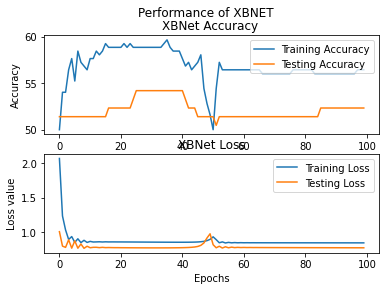

ok    61
Name: cholesterol_ldl_human, dtype: int64

In [89]:
# LDL
m_ldl = xbnet_model(df_trainu,y_cholesterol_ldl_human,2,0.01)
# Cholesterol ldl
cholesterol_ldl_human = predict(m_ldl,X_testu.to_numpy())
test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
test['cholesterol_ldl_human'].value_counts()

Enter dimensions of linear layers: 
Enter input dimensions of layer 1: 10
Enter output dimensions of layer 1: 10
Set bias as True or False: False
Enter input dimensions of layer 2: 10
Enter output dimensions of layer 2: 10
Set bias as True or False: False
Enter your last layer 
1. Sigmoid 
2. Softmax 
3. None 
3


Percentage training completed:   1%|          | 1/100 [00:00<01:00,  1.63it/s]

Training Loss after epoch 1 is 2.444442167878151 and Accuracy is 42.74193548387097
Validation Loss after epoch 1 is 1.7559454441070557 and Accuracy is 21.49532710280374


Percentage training completed:   2%|▏         | 2/100 [00:01<01:00,  1.63it/s]

Training Loss after epoch 2 is 1.545370802283287 and Accuracy is 53.62903225806452
Validation Loss after epoch 2 is 1.0833117961883545 and Accuracy is 53.271028037383175


Percentage training completed:   3%|▎         | 3/100 [00:01<01:00,  1.61it/s]

Training Loss after epoch 3 is 1.2351338118314743 and Accuracy is 37.903225806451616
Validation Loss after epoch 3 is 1.1517856121063232 and Accuracy is 25.233644859813083


Percentage training completed:   4%|▍         | 4/100 [00:02<00:59,  1.62it/s]

Training Loss after epoch 4 is 1.2924076840281487 and Accuracy is 46.774193548387096
Validation Loss after epoch 4 is 1.2594196796417236 and Accuracy is 25.233644859813083


Percentage training completed:   5%|▌         | 5/100 [00:03<00:57,  1.64it/s]

Training Loss after epoch 5 is 1.4057562202215195 and Accuracy is 43.54838709677419
Validation Loss after epoch 5 is 1.2673276662826538 and Accuracy is 28.037383177570092


Percentage training completed:   6%|▌         | 6/100 [00:03<00:56,  1.68it/s]

Training Loss after epoch 6 is 1.3882042169570923 and Accuracy is 41.12903225806452
Validation Loss after epoch 6 is 1.0629032850265503 and Accuracy is 35.51401869158879


Percentage training completed:   7%|▋         | 7/100 [00:04<00:54,  1.69it/s]

Training Loss after epoch 7 is 1.2560288906097412 and Accuracy is 43.145161290322584
Validation Loss after epoch 7 is 1.0682978630065918 and Accuracy is 53.271028037383175


Percentage training completed:   8%|▊         | 8/100 [00:04<00:53,  1.72it/s]

Training Loss after epoch 8 is 1.0865633636713028 and Accuracy is 48.79032258064516
Validation Loss after epoch 8 is 1.0101468563079834 and Accuracy is 53.271028037383175


Percentage training completed:   9%|▉         | 9/100 [00:05<00:53,  1.71it/s]

Training Loss after epoch 9 is 1.0588307455182076 and Accuracy is 54.03225806451613
Validation Loss after epoch 9 is 1.047711968421936 and Accuracy is 52.33644859813084


Percentage training completed:  10%|█         | 10/100 [00:05<00:51,  1.74it/s]

Training Loss after epoch 10 is 1.0941782742738724 and Accuracy is 53.225806451612904
Validation Loss after epoch 10 is 1.030924677848816 and Accuracy is 53.271028037383175


Percentage training completed:  11%|█         | 11/100 [00:06<00:51,  1.73it/s]

Training Loss after epoch 11 is 1.1026362925767899 and Accuracy is 48.79032258064516
Validation Loss after epoch 11 is 1.0239828824996948 and Accuracy is 53.271028037383175


Percentage training completed:  12%|█▏        | 12/100 [00:07<00:50,  1.74it/s]

Training Loss after epoch 12 is 1.0780430361628532 and Accuracy is 53.62903225806452
Validation Loss after epoch 12 is 1.0141054391860962 and Accuracy is 53.271028037383175


Percentage training completed:  13%|█▎        | 13/100 [00:07<00:50,  1.73it/s]

Training Loss after epoch 13 is 1.0592823773622513 and Accuracy is 54.03225806451613
Validation Loss after epoch 13 is 1.0173832178115845 and Accuracy is 53.271028037383175


Percentage training completed:  14%|█▍        | 14/100 [00:08<00:49,  1.73it/s]

Training Loss after epoch 14 is 1.0599519908428192 and Accuracy is 54.03225806451613
Validation Loss after epoch 14 is 1.014394760131836 and Accuracy is 53.271028037383175


Percentage training completed:  15%|█▌        | 15/100 [00:08<00:48,  1.74it/s]

Training Loss after epoch 15 is 1.0593891739845276 and Accuracy is 54.03225806451613
Validation Loss after epoch 15 is 1.012977957725525 and Accuracy is 53.271028037383175


Percentage training completed:  16%|█▌        | 16/100 [00:09<00:48,  1.74it/s]

Training Loss after epoch 16 is 1.0528402552008629 and Accuracy is 54.03225806451613
Validation Loss after epoch 16 is 1.0112344026565552 and Accuracy is 53.271028037383175


Percentage training completed:  17%|█▋        | 17/100 [00:09<00:47,  1.75it/s]

Training Loss after epoch 17 is 1.0466167628765106 and Accuracy is 54.03225806451613
Validation Loss after epoch 17 is 1.0101834535598755 and Accuracy is 53.271028037383175


Percentage training completed:  18%|█▊        | 18/100 [00:10<00:46,  1.76it/s]

Training Loss after epoch 18 is 1.0441068708896637 and Accuracy is 54.03225806451613
Validation Loss after epoch 18 is 1.009261965751648 and Accuracy is 53.271028037383175


Percentage training completed:  19%|█▉        | 19/100 [00:11<00:46,  1.76it/s]

Training Loss after epoch 19 is 1.0415721833705902 and Accuracy is 54.03225806451613
Validation Loss after epoch 19 is 1.0082192420959473 and Accuracy is 53.271028037383175


Percentage training completed:  20%|██        | 20/100 [00:11<00:45,  1.76it/s]

Training Loss after epoch 20 is 1.0380118861794472 and Accuracy is 54.03225806451613
Validation Loss after epoch 20 is 1.0075953006744385 and Accuracy is 53.271028037383175


Percentage training completed:  21%|██        | 21/100 [00:12<00:44,  1.77it/s]

Training Loss after epoch 21 is 1.0352091118693352 and Accuracy is 54.03225806451613
Validation Loss after epoch 21 is 1.0066591501235962 and Accuracy is 53.271028037383175


Percentage training completed:  22%|██▏       | 22/100 [00:12<00:44,  1.75it/s]

Training Loss after epoch 22 is 1.0329528898000717 and Accuracy is 54.03225806451613
Validation Loss after epoch 22 is 1.0060734748840332 and Accuracy is 53.271028037383175


Percentage training completed:  23%|██▎       | 23/100 [00:13<00:43,  1.77it/s]

Training Loss after epoch 23 is 1.0307808443903923 and Accuracy is 54.03225806451613
Validation Loss after epoch 23 is 1.0054258108139038 and Accuracy is 53.271028037383175


Percentage training completed:  24%|██▍       | 24/100 [00:13<00:42,  1.77it/s]

Training Loss after epoch 24 is 1.0285747200250626 and Accuracy is 54.03225806451613
Validation Loss after epoch 24 is 1.0048538446426392 and Accuracy is 53.271028037383175


Percentage training completed:  25%|██▌       | 25/100 [00:14<00:42,  1.76it/s]

Training Loss after epoch 25 is 1.0267318710684776 and Accuracy is 54.03225806451613
Validation Loss after epoch 25 is 1.0042767524719238 and Accuracy is 53.271028037383175


Percentage training completed:  26%|██▌       | 26/100 [00:15<00:41,  1.78it/s]

Training Loss after epoch 26 is 1.0249985605478287 and Accuracy is 54.03225806451613
Validation Loss after epoch 26 is 1.0037776231765747 and Accuracy is 53.271028037383175


Percentage training completed:  27%|██▋       | 27/100 [00:15<00:40,  1.79it/s]

Training Loss after epoch 27 is 1.0233631059527397 and Accuracy is 54.03225806451613
Validation Loss after epoch 27 is 1.0032984018325806 and Accuracy is 53.271028037383175


Percentage training completed:  28%|██▊       | 28/100 [00:16<00:40,  1.80it/s]

Training Loss after epoch 28 is 1.0218449607491493 and Accuracy is 54.03225806451613
Validation Loss after epoch 28 is 1.0028283596038818 and Accuracy is 53.271028037383175


Percentage training completed:  29%|██▉       | 29/100 [00:16<00:39,  1.78it/s]

Training Loss after epoch 29 is 1.0204462632536888 and Accuracy is 54.03225806451613
Validation Loss after epoch 29 is 1.0023959875106812 and Accuracy is 53.271028037383175


Percentage training completed:  30%|███       | 30/100 [00:17<00:39,  1.78it/s]

Training Loss after epoch 30 is 1.0191362798213959 and Accuracy is 54.03225806451613
Validation Loss after epoch 30 is 1.0019856691360474 and Accuracy is 53.271028037383175


Percentage training completed:  31%|███       | 31/100 [00:17<00:38,  1.79it/s]

Training Loss after epoch 31 is 1.0179001241922379 and Accuracy is 54.03225806451613
Validation Loss after epoch 31 is 1.0015937089920044 and Accuracy is 53.271028037383175


Percentage training completed:  32%|███▏      | 32/100 [00:18<00:38,  1.78it/s]

Training Loss after epoch 32 is 1.0167476758360863 and Accuracy is 54.03225806451613
Validation Loss after epoch 32 is 1.0012187957763672 and Accuracy is 53.271028037383175


Percentage training completed:  33%|███▎      | 33/100 [00:18<00:37,  1.79it/s]

Training Loss after epoch 33 is 1.0156617164611816 and Accuracy is 54.03225806451613
Validation Loss after epoch 33 is 1.00086510181427 and Accuracy is 53.271028037383175


Percentage training completed:  34%|███▍      | 34/100 [00:19<00:37,  1.77it/s]

Training Loss after epoch 34 is 1.0146387070417404 and Accuracy is 54.03225806451613
Validation Loss after epoch 34 is 1.0005277395248413 and Accuracy is 53.271028037383175


Percentage training completed:  35%|███▌      | 35/100 [00:20<00:36,  1.80it/s]

Training Loss after epoch 35 is 1.0136710703372955 and Accuracy is 54.03225806451613
Validation Loss after epoch 35 is 1.000205397605896 and Accuracy is 53.271028037383175


Percentage training completed:  36%|███▌      | 36/100 [00:20<00:35,  1.80it/s]

Training Loss after epoch 36 is 1.0127567425370216 and Accuracy is 54.03225806451613
Validation Loss after epoch 36 is 0.9998979568481445 and Accuracy is 53.271028037383175


Percentage training completed:  37%|███▋      | 37/100 [00:21<00:34,  1.80it/s]

Training Loss after epoch 37 is 1.0118900462985039 and Accuracy is 54.03225806451613
Validation Loss after epoch 37 is 0.999604344367981 and Accuracy is 53.271028037383175


Percentage training completed:  38%|███▊      | 38/100 [00:21<00:34,  1.78it/s]

Training Loss after epoch 38 is 1.0110671892762184 and Accuracy is 54.03225806451613
Validation Loss after epoch 38 is 0.9993235468864441 and Accuracy is 53.271028037383175


Percentage training completed:  39%|███▉      | 39/100 [00:22<00:34,  1.79it/s]

Training Loss after epoch 39 is 1.0102849379181862 and Accuracy is 54.03225806451613
Validation Loss after epoch 39 is 0.9990540742874146 and Accuracy is 53.271028037383175


Percentage training completed:  40%|████      | 40/100 [00:22<00:33,  1.80it/s]

Training Loss after epoch 40 is 1.0095403864979744 and Accuracy is 54.03225806451613
Validation Loss after epoch 40 is 0.9987950921058655 and Accuracy is 53.271028037383175


Percentage training completed:  41%|████      | 41/100 [00:23<00:32,  1.80it/s]

Training Loss after epoch 41 is 1.0088309571146965 and Accuracy is 54.03225806451613
Validation Loss after epoch 41 is 0.9985455274581909 and Accuracy is 53.271028037383175


Percentage training completed:  42%|████▏     | 42/100 [00:23<00:32,  1.79it/s]

Training Loss after epoch 42 is 1.0081541240215302 and Accuracy is 54.03225806451613
Validation Loss after epoch 42 is 0.9983044266700745 and Accuracy is 53.271028037383175


Percentage training completed:  43%|████▎     | 43/100 [00:24<00:31,  1.79it/s]

Training Loss after epoch 43 is 1.0075079426169395 and Accuracy is 54.03225806451613
Validation Loss after epoch 43 is 0.9980706572532654 and Accuracy is 53.271028037383175


Percentage training completed:  44%|████▍     | 44/100 [00:25<00:31,  1.78it/s]

Training Loss after epoch 44 is 1.00689048320055 and Accuracy is 54.03225806451613
Validation Loss after epoch 44 is 0.9978429079055786 and Accuracy is 53.271028037383175


Percentage training completed:  45%|████▌     | 45/100 [00:25<00:31,  1.77it/s]

Training Loss after epoch 45 is 1.0063002705574036 and Accuracy is 54.03225806451613
Validation Loss after epoch 45 is 0.9976205825805664 and Accuracy is 53.271028037383175


Percentage training completed:  46%|████▌     | 46/100 [00:26<00:30,  1.77it/s]

Training Loss after epoch 46 is 1.0057356804609299 and Accuracy is 54.03225806451613
Validation Loss after epoch 46 is 0.997402548789978 and Accuracy is 53.271028037383175


Percentage training completed:  47%|████▋     | 47/100 [00:26<00:29,  1.77it/s]

Training Loss after epoch 47 is 1.0051954686641693 and Accuracy is 54.03225806451613
Validation Loss after epoch 47 is 0.9971877932548523 and Accuracy is 53.271028037383175


Percentage training completed:  48%|████▊     | 48/100 [00:27<00:29,  1.79it/s]

Training Loss after epoch 48 is 1.0046785026788712 and Accuracy is 54.03225806451613
Validation Loss after epoch 48 is 0.9969757199287415 and Accuracy is 53.271028037383175


Percentage training completed:  49%|████▉     | 49/100 [00:28<00:37,  1.36it/s]

Training Loss after epoch 49 is 1.0041836649179459 and Accuracy is 54.03225806451613
Validation Loss after epoch 49 is 0.9967655539512634 and Accuracy is 53.271028037383175


Percentage training completed:  50%|█████     | 50/100 [00:29<00:34,  1.46it/s]

Training Loss after epoch 50 is 1.003709964454174 and Accuracy is 54.03225806451613
Validation Loss after epoch 50 is 0.9965568780899048 and Accuracy is 53.271028037383175


Percentage training completed:  51%|█████     | 51/100 [00:29<00:31,  1.57it/s]

Training Loss after epoch 51 is 1.0032566264271736 and Accuracy is 54.03225806451613
Validation Loss after epoch 51 is 0.9963490962982178 and Accuracy is 53.271028037383175


Percentage training completed:  52%|█████▏    | 52/100 [00:30<00:29,  1.63it/s]

Training Loss after epoch 52 is 1.0028225854039192 and Accuracy is 54.03225806451613
Validation Loss after epoch 52 is 0.9961422681808472 and Accuracy is 53.271028037383175


Percentage training completed:  53%|█████▎    | 53/100 [00:30<00:28,  1.68it/s]

Training Loss after epoch 53 is 1.0024072900414467 and Accuracy is 54.435483870967744
Validation Loss after epoch 53 is 0.9959362745285034 and Accuracy is 53.271028037383175


Percentage training completed:  54%|█████▍    | 54/100 [00:31<00:26,  1.72it/s]

Training Loss after epoch 54 is 1.002010017633438 and Accuracy is 54.435483870967744
Validation Loss after epoch 54 is 0.9957314729690552 and Accuracy is 53.271028037383175


Percentage training completed:  55%|█████▌    | 55/100 [00:31<00:25,  1.74it/s]

Training Loss after epoch 55 is 1.00163022428751 and Accuracy is 54.435483870967744
Validation Loss after epoch 55 is 0.9955284595489502 and Accuracy is 53.271028037383175


Percentage training completed:  56%|█████▌    | 56/100 [00:32<00:25,  1.76it/s]

Training Loss after epoch 56 is 1.0012675896286964 and Accuracy is 54.435483870967744
Validation Loss after epoch 56 is 0.995327889919281 and Accuracy is 53.271028037383175


Percentage training completed:  57%|█████▋    | 57/100 [00:32<00:24,  1.77it/s]

Training Loss after epoch 57 is 1.000921718776226 and Accuracy is 54.435483870967744
Validation Loss after epoch 57 is 0.9951306581497192 and Accuracy is 53.271028037383175


Percentage training completed:  58%|█████▊    | 58/100 [00:33<00:23,  1.79it/s]

Training Loss after epoch 58 is 1.0005928725004196 and Accuracy is 54.435483870967744
Validation Loss after epoch 58 is 0.9949377775192261 and Accuracy is 53.271028037383175


Percentage training completed:  59%|█████▉    | 59/100 [00:33<00:22,  1.79it/s]

Training Loss after epoch 59 is 1.0002814680337906 and Accuracy is 54.435483870967744
Validation Loss after epoch 59 is 0.994750440120697 and Accuracy is 53.271028037383175


Percentage training completed:  60%|██████    | 60/100 [00:34<00:22,  1.80it/s]

Training Loss after epoch 60 is 0.9999884217977524 and Accuracy is 54.435483870967744
Validation Loss after epoch 60 is 0.9945694208145142 and Accuracy is 53.271028037383175


Percentage training completed:  61%|██████    | 61/100 [00:35<00:21,  1.78it/s]

Training Loss after epoch 61 is 0.9997153729200363 and Accuracy is 54.435483870967744
Validation Loss after epoch 61 is 0.9943956732749939 and Accuracy is 53.271028037383175


Percentage training completed:  62%|██████▏   | 62/100 [00:35<00:21,  1.79it/s]

Training Loss after epoch 62 is 0.9994645267724991 and Accuracy is 54.03225806451613
Validation Loss after epoch 62 is 0.9942295551300049 and Accuracy is 53.271028037383175


Percentage training completed:  63%|██████▎   | 63/100 [00:36<00:20,  1.79it/s]

Training Loss after epoch 63 is 0.999238908290863 and Accuracy is 54.03225806451613
Validation Loss after epoch 63 is 0.994071364402771 and Accuracy is 53.271028037383175


Percentage training completed:  64%|██████▍   | 64/100 [00:36<00:19,  1.80it/s]

Training Loss after epoch 64 is 0.9990419894456863 and Accuracy is 54.03225806451613
Validation Loss after epoch 64 is 0.9939213991165161 and Accuracy is 53.271028037383175


Percentage training completed:  65%|██████▌   | 65/100 [00:37<00:19,  1.81it/s]

Training Loss after epoch 65 is 0.9988777711987495 and Accuracy is 54.03225806451613
Validation Loss after epoch 65 is 0.9937797784805298 and Accuracy is 53.271028037383175


Percentage training completed:  66%|██████▌   | 66/100 [00:37<00:18,  1.80it/s]

Training Loss after epoch 66 is 0.9987500905990601 and Accuracy is 54.03225806451613
Validation Loss after epoch 66 is 0.9936475157737732 and Accuracy is 53.271028037383175


Percentage training completed:  67%|██████▋   | 67/100 [00:38<00:18,  1.82it/s]

Training Loss after epoch 67 is 0.9986620023846626 and Accuracy is 53.62903225806452
Validation Loss after epoch 67 is 0.9935263991355896 and Accuracy is 53.271028037383175


Percentage training completed:  68%|██████▊   | 68/100 [00:38<00:17,  1.83it/s]

Training Loss after epoch 68 is 0.998614676296711 and Accuracy is 53.62903225806452
Validation Loss after epoch 68 is 0.9934203028678894 and Accuracy is 53.271028037383175


Percentage training completed:  69%|██████▉   | 69/100 [00:39<00:16,  1.84it/s]

Training Loss after epoch 69 is 0.9986055120825768 and Accuracy is 53.225806451612904
Validation Loss after epoch 69 is 0.9933345913887024 and Accuracy is 53.271028037383175


Percentage training completed:  70%|███████   | 70/100 [00:40<00:16,  1.85it/s]

Training Loss after epoch 70 is 0.9986272752285004 and Accuracy is 53.225806451612904
Validation Loss after epoch 70 is 0.9932767748832703 and Accuracy is 53.271028037383175


Percentage training completed:  71%|███████   | 71/100 [00:40<00:15,  1.82it/s]

Training Loss after epoch 71 is 0.9986655488610268 and Accuracy is 53.225806451612904
Validation Loss after epoch 71 is 0.9932548403739929 and Accuracy is 53.271028037383175


Percentage training completed:  72%|███████▏  | 72/100 [00:41<00:16,  1.72it/s]

Training Loss after epoch 72 is 0.9986988008022308 and Accuracy is 53.225806451612904
Validation Loss after epoch 72 is 0.9932770729064941 and Accuracy is 53.271028037383175


Percentage training completed:  73%|███████▎  | 73/100 [00:41<00:15,  1.76it/s]

Training Loss after epoch 73 is 0.9986979812383652 and Accuracy is 53.225806451612904
Validation Loss after epoch 73 is 0.9933517575263977 and Accuracy is 53.271028037383175


Percentage training completed:  74%|███████▍  | 74/100 [00:42<00:14,  1.76it/s]

Training Loss after epoch 74 is 0.9986298978328705 and Accuracy is 53.225806451612904
Validation Loss after epoch 74 is 0.9934879541397095 and Accuracy is 53.271028037383175


Percentage training completed:  75%|███████▌  | 75/100 [00:42<00:14,  1.76it/s]

Training Loss after epoch 75 is 0.9984636008739471 and Accuracy is 53.225806451612904
Validation Loss after epoch 75 is 0.9936966896057129 and Accuracy is 53.271028037383175


Percentage training completed:  76%|███████▌  | 76/100 [00:43<00:13,  1.80it/s]

Training Loss after epoch 76 is 0.9981786385178566 and Accuracy is 53.225806451612904
Validation Loss after epoch 76 is 0.9939875602722168 and Accuracy is 53.271028037383175


Percentage training completed:  77%|███████▋  | 77/100 [00:44<00:12,  1.80it/s]

Training Loss after epoch 77 is 0.9977744668722153 and Accuracy is 53.225806451612904
Validation Loss after epoch 77 is 0.9943609237670898 and Accuracy is 53.271028037383175


Percentage training completed:  78%|███████▊  | 78/100 [00:44<00:12,  1.82it/s]

Training Loss after epoch 78 is 0.9972743391990662 and Accuracy is 53.225806451612904
Validation Loss after epoch 78 is 0.9947969913482666 and Accuracy is 53.271028037383175


Percentage training completed:  79%|███████▉  | 79/100 [00:45<00:11,  1.82it/s]

Training Loss after epoch 79 is 0.9967222735285759 and Accuracy is 54.03225806451613
Validation Loss after epoch 79 is 0.9952523708343506 and Accuracy is 53.271028037383175


Percentage training completed:  80%|████████  | 80/100 [00:45<00:10,  1.84it/s]

Training Loss after epoch 80 is 0.9961714819073677 and Accuracy is 54.03225806451613
Validation Loss after epoch 80 is 0.9956693053245544 and Accuracy is 53.271028037383175


Percentage training completed:  81%|████████  | 81/100 [00:46<00:10,  1.83it/s]

Training Loss after epoch 81 is 0.995670273900032 and Accuracy is 53.62903225806452
Validation Loss after epoch 81 is 0.9959940910339355 and Accuracy is 53.271028037383175


Percentage training completed:  82%|████████▏ | 82/100 [00:46<00:09,  1.85it/s]

Training Loss after epoch 82 is 0.9952529892325401 and Accuracy is 53.225806451612904
Validation Loss after epoch 82 is 0.9961938261985779 and Accuracy is 53.271028037383175


Percentage training completed:  83%|████████▎ | 83/100 [00:47<00:09,  1.84it/s]

Training Loss after epoch 83 is 0.9949383288621902 and Accuracy is 53.62903225806452
Validation Loss after epoch 83 is 0.9962623119354248 and Accuracy is 53.271028037383175


Percentage training completed:  84%|████████▍ | 84/100 [00:47<00:08,  1.85it/s]

Training Loss after epoch 84 is 0.9947337061166763 and Accuracy is 53.62903225806452
Validation Loss after epoch 84 is 0.9962146878242493 and Accuracy is 53.271028037383175


Percentage training completed:  85%|████████▌ | 85/100 [00:48<00:08,  1.86it/s]

Training Loss after epoch 85 is 0.9946403056383133 and Accuracy is 53.225806451612904
Validation Loss after epoch 85 is 0.9960778951644897 and Accuracy is 53.271028037383175


Percentage training completed:  86%|████████▌ | 86/100 [00:48<00:07,  1.85it/s]

Training Loss after epoch 86 is 0.9946579113602638 and Accuracy is 53.225806451612904
Validation Loss after epoch 86 is 0.9958810806274414 and Accuracy is 53.271028037383175


Percentage training completed:  87%|████████▋ | 87/100 [00:49<00:07,  1.84it/s]

Training Loss after epoch 87 is 0.9947874397039413 and Accuracy is 53.225806451612904
Validation Loss after epoch 87 is 0.9956511855125427 and Accuracy is 53.271028037383175


Percentage training completed:  88%|████████▊ | 88/100 [00:49<00:06,  1.83it/s]

Training Loss after epoch 88 is 0.9950304329395294 and Accuracy is 53.225806451612904
Validation Loss after epoch 88 is 0.9954131841659546 and Accuracy is 53.271028037383175


Percentage training completed:  89%|████████▉ | 89/100 [00:50<00:06,  1.83it/s]

Training Loss after epoch 89 is 0.9953862056136131 and Accuracy is 53.225806451612904
Validation Loss after epoch 89 is 0.9951943159103394 and Accuracy is 53.271028037383175


Percentage training completed:  90%|█████████ | 90/100 [00:51<00:05,  1.80it/s]

Training Loss after epoch 90 is 0.9958437457680702 and Accuracy is 53.225806451612904
Validation Loss after epoch 90 is 0.9950248599052429 and Accuracy is 53.271028037383175


Percentage training completed:  91%|█████████ | 91/100 [00:51<00:04,  1.81it/s]

Training Loss after epoch 91 is 0.9963691234588623 and Accuracy is 52.82258064516129
Validation Loss after epoch 91 is 0.9949319958686829 and Accuracy is 53.271028037383175


Percentage training completed:  92%|█████████▏| 92/100 [00:52<00:04,  1.79it/s]

Training Loss after epoch 92 is 0.9968905970454216 and Accuracy is 52.82258064516129
Validation Loss after epoch 92 is 0.9949259161949158 and Accuracy is 53.271028037383175


Percentage training completed:  93%|█████████▎| 93/100 [00:52<00:03,  1.79it/s]

Training Loss after epoch 93 is 0.9972858503460884 and Accuracy is 52.82258064516129
Validation Loss after epoch 93 is 0.9950087070465088 and Accuracy is 53.271028037383175


Percentage training completed:  94%|█████████▍| 94/100 [00:53<00:03,  1.76it/s]

Training Loss after epoch 94 is 0.9973876029253006 and Accuracy is 52.82258064516129
Validation Loss after epoch 94 is 0.9952355623245239 and Accuracy is 53.271028037383175


Percentage training completed:  95%|█████████▌| 95/100 [00:53<00:02,  1.78it/s]

Training Loss after epoch 95 is 0.9970306977629662 and Accuracy is 52.82258064516129
Validation Loss after epoch 95 is 0.9957829713821411 and Accuracy is 53.271028037383175


Percentage training completed:  96%|█████████▌| 96/100 [00:54<00:02,  1.78it/s]

Training Loss after epoch 96 is 0.996156170964241 and Accuracy is 52.82258064516129
Validation Loss after epoch 96 is 0.9968502521514893 and Accuracy is 53.271028037383175


Percentage training completed:  97%|█████████▋| 97/100 [00:55<00:01,  1.79it/s]

Training Loss after epoch 97 is 0.9949138164520264 and Accuracy is 53.62903225806452
Validation Loss after epoch 97 is 0.9983695149421692 and Accuracy is 52.33644859813084


Percentage training completed:  98%|█████████▊| 98/100 [00:55<00:01,  1.79it/s]

Training Loss after epoch 98 is 0.9936211630702019 and Accuracy is 53.62903225806452
Validation Loss after epoch 98 is 0.9998986721038818 and Accuracy is 52.33644859813084


Percentage training completed:  99%|█████████▉| 99/100 [00:56<00:00,  1.80it/s]

Training Loss after epoch 99 is 0.9925646707415581 and Accuracy is 53.62903225806452
Validation Loss after epoch 99 is 1.0009419918060303 and Accuracy is 52.33644859813084


Percentage training completed: 100%|██████████| 100/100 [00:56<00:00,  1.76it/s]

Training Loss after epoch 100 is 0.9918549433350563 and Accuracy is 53.62903225806452
Validation Loss after epoch 100 is 1.0012935400009155 and Accuracy is 52.33644859813084
              precision    recall  f1-score   support

           0       0.33      0.02      0.03        66
           1       0.54      0.99      0.70       134
           2       0.00      0.00      0.00        48

    accuracy                           0.54       248
   macro avg       0.29      0.33      0.24       248
weighted avg       0.38      0.54      0.38       248

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.53      0.98      0.69        57
           2       0.00      0.00      0.00        27

    accuracy                           0.52       107
   macro avg       0.18      0.33      0.23       107
weighted avg       0.28      0.52      0.37       107

Validation Loss after epoch 100 is 1.0012935400009155 and Accura

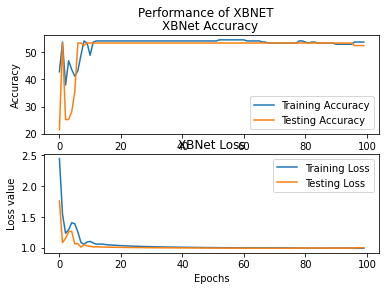

ok    61
Name: hdl_cholesterol_human, dtype: int64

In [90]:
# HDL
m_hdl = xbnet_model(df_trainu,y_hdl_cholesterol_human,2,0.01)
# Cholesterol hdl
hdl_cholesterol_human = predict(m_hdl,X_testu.to_numpy())
test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
test['hdl_cholesterol_human'].value_counts()

Enter dimensions of linear layers: 
Enter input dimensions of layer 1: 10
Enter output dimensions of layer 1: 10
Set bias as True or False: False
Enter input dimensions of layer 2: 10
Enter output dimensions of layer 2: 10
Set bias as True or False: False
Enter your last layer 
1. Sigmoid 
2. Softmax 
3. None 
3


Percentage training completed:   1%|          | 1/100 [00:00<00:41,  2.38it/s]

Training Loss after epoch 1 is 1.207161145284772 and Accuracy is 88.30645161290323
Validation Loss after epoch 1 is 0.6726456880569458 and Accuracy is 85.04672897196262


Percentage training completed:   2%|▏         | 2/100 [00:00<00:39,  2.49it/s]

Training Loss after epoch 2 is 0.7838617172092199 and Accuracy is 77.8225806451613
Validation Loss after epoch 2 is 1.3318895101547241 and Accuracy is 85.04672897196262


Percentage training completed:   3%|▎         | 3/100 [00:01<00:38,  2.54it/s]

Training Loss after epoch 3 is 0.6310552358627319 and Accuracy is 88.30645161290323
Validation Loss after epoch 3 is 0.7992247343063354 and Accuracy is 85.04672897196262


Percentage training completed:   4%|▍         | 4/100 [00:01<00:37,  2.55it/s]

Training Loss after epoch 4 is 0.4942841921001673 and Accuracy is 88.30645161290323
Validation Loss after epoch 4 is 0.6057398915290833 and Accuracy is 85.04672897196262


Percentage training completed:   5%|▌         | 5/100 [00:01<00:36,  2.58it/s]

Training Loss after epoch 5 is 0.5194759927690029 and Accuracy is 88.30645161290323
Validation Loss after epoch 5 is 0.8084056973457336 and Accuracy is 85.04672897196262


Percentage training completed:   6%|▌         | 6/100 [00:02<00:35,  2.62it/s]

Training Loss after epoch 6 is 0.5254668071866035 and Accuracy is 88.30645161290323
Validation Loss after epoch 6 is 0.6720377802848816 and Accuracy is 85.04672897196262


Percentage training completed:   7%|▋         | 7/100 [00:02<00:35,  2.63it/s]

Training Loss after epoch 7 is 0.4820129480212927 and Accuracy is 88.30645161290323
Validation Loss after epoch 7 is 0.6323729753494263 and Accuracy is 85.04672897196262


Percentage training completed:   8%|▊         | 8/100 [00:03<00:34,  2.68it/s]

Training Loss after epoch 8 is 0.47496000304818153 and Accuracy is 88.30645161290323
Validation Loss after epoch 8 is 0.6805064678192139 and Accuracy is 85.04672897196262


Percentage training completed:   9%|▉         | 9/100 [00:03<00:33,  2.72it/s]

Training Loss after epoch 9 is 0.4895128346979618 and Accuracy is 88.30645161290323
Validation Loss after epoch 9 is 0.6643444895744324 and Accuracy is 85.04672897196262


Percentage training completed:  10%|█         | 10/100 [00:03<00:32,  2.75it/s]

Training Loss after epoch 10 is 0.4856055788695812 and Accuracy is 88.30645161290323
Validation Loss after epoch 10 is 0.6466415524482727 and Accuracy is 85.04672897196262


Percentage training completed:  11%|█         | 11/100 [00:04<00:32,  2.77it/s]

Training Loss after epoch 11 is 0.4773418828845024 and Accuracy is 88.30645161290323
Validation Loss after epoch 11 is 0.6565594673156738 and Accuracy is 85.04672897196262


Percentage training completed:  12%|█▏        | 12/100 [00:04<00:31,  2.80it/s]

Training Loss after epoch 12 is 0.4770474638789892 and Accuracy is 88.30645161290323
Validation Loss after epoch 12 is 0.6582862138748169 and Accuracy is 85.04672897196262


Percentage training completed:  13%|█▎        | 13/100 [00:04<00:31,  2.78it/s]

Training Loss after epoch 13 is 0.4773345198482275 and Accuracy is 88.30645161290323
Validation Loss after epoch 13 is 0.6510912179946899 and Accuracy is 85.04672897196262


Percentage training completed:  14%|█▍        | 14/100 [00:05<00:30,  2.81it/s]

Training Loss after epoch 14 is 0.4746889341622591 and Accuracy is 88.30645161290323
Validation Loss after epoch 14 is 0.6494995355606079 and Accuracy is 85.04672897196262


Percentage training completed:  15%|█▌        | 15/100 [00:05<00:30,  2.83it/s]

Training Loss after epoch 15 is 0.4722521938383579 and Accuracy is 88.30645161290323
Validation Loss after epoch 15 is 0.651557445526123 and Accuracy is 85.04672897196262


Percentage training completed:  16%|█▌        | 16/100 [00:05<00:29,  2.80it/s]

Training Loss after epoch 16 is 0.4709637984633446 and Accuracy is 88.30645161290323
Validation Loss after epoch 16 is 0.6511214971542358 and Accuracy is 85.04672897196262


Percentage training completed:  17%|█▋        | 17/100 [00:06<00:29,  2.84it/s]

Training Loss after epoch 17 is 0.46968033351004124 and Accuracy is 88.30645161290323
Validation Loss after epoch 17 is 0.6491948366165161 and Accuracy is 85.04672897196262


Percentage training completed:  18%|█▊        | 18/100 [00:06<00:28,  2.87it/s]

Training Loss after epoch 18 is 0.46818277798593044 and Accuracy is 88.30645161290323
Validation Loss after epoch 18 is 0.6484671831130981 and Accuracy is 85.04672897196262


Percentage training completed:  19%|█▉        | 19/100 [00:06<00:28,  2.83it/s]

Training Loss after epoch 19 is 0.46683243848383427 and Accuracy is 88.30645161290323
Validation Loss after epoch 19 is 0.648623526096344 and Accuracy is 85.04672897196262


Percentage training completed:  20%|██        | 20/100 [00:07<00:28,  2.84it/s]

Training Loss after epoch 20 is 0.46566407941281796 and Accuracy is 88.30645161290323
Validation Loss after epoch 20 is 0.6484915018081665 and Accuracy is 85.04672897196262


Percentage training completed:  21%|██        | 21/100 [00:07<00:27,  2.85it/s]

Training Loss after epoch 21 is 0.46460009552538395 and Accuracy is 88.30645161290323
Validation Loss after epoch 21 is 0.6480324268341064 and Accuracy is 85.04672897196262


Percentage training completed:  22%|██▏       | 22/100 [00:08<00:27,  2.85it/s]

Training Loss after epoch 22 is 0.4636117573827505 and Accuracy is 88.30645161290323
Validation Loss after epoch 22 is 0.6476470828056335 and Accuracy is 85.04672897196262


Percentage training completed:  23%|██▎       | 23/100 [00:08<00:27,  2.84it/s]

Training Loss after epoch 23 is 0.46267714351415634 and Accuracy is 88.30645161290323
Validation Loss after epoch 23 is 0.6474318504333496 and Accuracy is 85.04672897196262


Percentage training completed:  24%|██▍       | 24/100 [00:08<00:26,  2.83it/s]

Training Loss after epoch 24 is 0.4618098046630621 and Accuracy is 88.30645161290323
Validation Loss after epoch 24 is 0.6472848057746887 and Accuracy is 85.04672897196262


Percentage training completed:  25%|██▌       | 25/100 [00:09<00:26,  2.85it/s]

Training Loss after epoch 25 is 0.4610189162194729 and Accuracy is 88.30645161290323
Validation Loss after epoch 25 is 0.6471104621887207 and Accuracy is 85.04672897196262


Percentage training completed:  26%|██▌       | 26/100 [00:09<00:25,  2.85it/s]

Training Loss after epoch 26 is 0.4602843690663576 and Accuracy is 88.30645161290323
Validation Loss after epoch 26 is 0.6468981504440308 and Accuracy is 85.04672897196262


Percentage training completed:  27%|██▋       | 27/100 [00:09<00:25,  2.84it/s]

Training Loss after epoch 27 is 0.45959522761404514 and Accuracy is 88.30645161290323
Validation Loss after epoch 27 is 0.6466884613037109 and Accuracy is 85.04672897196262


Percentage training completed:  28%|██▊       | 28/100 [00:10<00:26,  2.77it/s]

Training Loss after epoch 28 is 0.458950400352478 and Accuracy is 88.30645161290323
Validation Loss after epoch 28 is 0.6464983820915222 and Accuracy is 85.04672897196262


Percentage training completed:  29%|██▉       | 29/100 [00:10<00:25,  2.79it/s]

Training Loss after epoch 29 is 0.45834533870220184 and Accuracy is 88.30645161290323
Validation Loss after epoch 29 is 0.6463173627853394 and Accuracy is 85.04672897196262


Percentage training completed:  30%|███       | 30/100 [00:10<00:25,  2.76it/s]

Training Loss after epoch 30 is 0.4577774088829756 and Accuracy is 88.30645161290323
Validation Loss after epoch 30 is 0.6461364030838013 and Accuracy is 85.04672897196262


Percentage training completed:  31%|███       | 31/100 [00:11<00:24,  2.79it/s]

Training Loss after epoch 31 is 0.457243075594306 and Accuracy is 88.30645161290323
Validation Loss after epoch 31 is 0.6459524631500244 and Accuracy is 85.04672897196262


Percentage training completed:  32%|███▏      | 32/100 [00:11<00:24,  2.78it/s]

Training Loss after epoch 32 is 0.4567381050437689 and Accuracy is 88.30645161290323
Validation Loss after epoch 32 is 0.6457687616348267 and Accuracy is 85.04672897196262


Percentage training completed:  33%|███▎      | 33/100 [00:11<00:24,  2.72it/s]

Training Loss after epoch 33 is 0.4562600292265415 and Accuracy is 88.30645161290323
Validation Loss after epoch 33 is 0.6455889940261841 and Accuracy is 85.04672897196262


Percentage training completed:  34%|███▍      | 34/100 [00:12<00:23,  2.77it/s]

Training Loss after epoch 34 is 0.4558065067976713 and Accuracy is 88.30645161290323
Validation Loss after epoch 34 is 0.6454145908355713 and Accuracy is 85.04672897196262


Percentage training completed:  35%|███▌      | 35/100 [00:12<00:23,  2.79it/s]

Training Loss after epoch 35 is 0.4553756471723318 and Accuracy is 88.30645161290323
Validation Loss after epoch 35 is 0.6452456712722778 and Accuracy is 85.04672897196262


Percentage training completed:  36%|███▌      | 36/100 [00:13<00:23,  2.72it/s]

Training Loss after epoch 36 is 0.454965703189373 and Accuracy is 88.30645161290323
Validation Loss after epoch 36 is 0.6450823545455933 and Accuracy is 85.04672897196262


Percentage training completed:  37%|███▋      | 37/100 [00:13<00:22,  2.76it/s]

Training Loss after epoch 37 is 0.45457497611641884 and Accuracy is 88.30645161290323
Validation Loss after epoch 37 is 0.6449248790740967 and Accuracy is 85.04672897196262


Percentage training completed:  38%|███▊      | 38/100 [00:13<00:22,  2.78it/s]

Training Loss after epoch 38 is 0.45420211367309093 and Accuracy is 88.30645161290323
Validation Loss after epoch 38 is 0.6447739601135254 and Accuracy is 85.04672897196262


Percentage training completed:  39%|███▉      | 39/100 [00:14<00:22,  2.74it/s]

Training Loss after epoch 39 is 0.4538457989692688 and Accuracy is 88.30645161290323
Validation Loss after epoch 39 is 0.6446301937103271 and Accuracy is 85.04672897196262


Percentage training completed:  40%|████      | 40/100 [00:14<00:21,  2.78it/s]

Training Loss after epoch 40 is 0.45350496284663677 and Accuracy is 88.30645161290323
Validation Loss after epoch 40 is 0.6444941163063049 and Accuracy is 85.04672897196262


Percentage training completed:  41%|████      | 41/100 [00:14<00:21,  2.74it/s]

Training Loss after epoch 41 is 0.4531787019222975 and Accuracy is 88.30645161290323
Validation Loss after epoch 41 is 0.6443657875061035 and Accuracy is 85.04672897196262


Percentage training completed:  42%|████▏     | 42/100 [00:15<00:21,  2.74it/s]

Training Loss after epoch 42 is 0.4528660885989666 and Accuracy is 88.30645161290323
Validation Loss after epoch 42 is 0.644244909286499 and Accuracy is 85.04672897196262


Percentage training completed:  43%|████▎     | 43/100 [00:15<00:20,  2.76it/s]

Training Loss after epoch 43 is 0.45256636664271355 and Accuracy is 88.30645161290323
Validation Loss after epoch 43 is 0.6441316604614258 and Accuracy is 85.04672897196262


Percentage training completed:  44%|████▍     | 44/100 [00:15<00:20,  2.71it/s]

Training Loss after epoch 44 is 0.4522786997258663 and Accuracy is 88.30645161290323
Validation Loss after epoch 44 is 0.6440261602401733 and Accuracy is 85.04672897196262


Percentage training completed:  45%|████▌     | 45/100 [00:16<00:20,  2.73it/s]

Training Loss after epoch 45 is 0.4520025085657835 and Accuracy is 88.30645161290323
Validation Loss after epoch 45 is 0.643927812576294 and Accuracy is 85.04672897196262


Percentage training completed:  46%|████▌     | 46/100 [00:16<00:19,  2.79it/s]

Training Loss after epoch 46 is 0.4517372138798237 and Accuracy is 88.30645161290323
Validation Loss after epoch 46 is 0.6438370943069458 and Accuracy is 85.04672897196262


Percentage training completed:  47%|████▋     | 47/100 [00:17<00:19,  2.77it/s]

Training Loss after epoch 47 is 0.4514821209013462 and Accuracy is 88.30645161290323
Validation Loss after epoch 47 is 0.6437532901763916 and Accuracy is 85.04672897196262


Percentage training completed:  48%|████▊     | 48/100 [00:17<00:18,  2.78it/s]

Training Loss after epoch 48 is 0.45123687013983727 and Accuracy is 88.30645161290323
Validation Loss after epoch 48 is 0.6436765193939209 and Accuracy is 85.04672897196262


Percentage training completed:  49%|████▉     | 49/100 [00:17<00:18,  2.82it/s]

Training Loss after epoch 49 is 0.4510009214282036 and Accuracy is 88.30645161290323
Validation Loss after epoch 49 is 0.6436061859130859 and Accuracy is 85.04672897196262


Percentage training completed:  50%|█████     | 50/100 [00:18<00:18,  2.77it/s]

Training Loss after epoch 50 is 0.45077373273670673 and Accuracy is 88.30645161290323
Validation Loss after epoch 50 is 0.6435425281524658 and Accuracy is 85.04672897196262


Percentage training completed:  51%|█████     | 51/100 [00:18<00:17,  2.77it/s]

Training Loss after epoch 51 is 0.450555007904768 and Accuracy is 88.30645161290323
Validation Loss after epoch 51 is 0.6434851884841919 and Accuracy is 85.04672897196262


Percentage training completed:  52%|█████▏    | 52/100 [00:18<00:17,  2.80it/s]

Training Loss after epoch 52 is 0.45034433901309967 and Accuracy is 88.30645161290323
Validation Loss after epoch 52 is 0.6434339284896851 and Accuracy is 85.04672897196262


Percentage training completed:  53%|█████▎    | 53/100 [00:19<00:16,  2.82it/s]

Training Loss after epoch 53 is 0.4501413144171238 and Accuracy is 88.30645161290323
Validation Loss after epoch 53 is 0.6433887481689453 and Accuracy is 85.04672897196262


Percentage training completed:  54%|█████▍    | 54/100 [00:19<00:16,  2.85it/s]

Training Loss after epoch 54 is 0.4499457012861967 and Accuracy is 88.30645161290323
Validation Loss after epoch 54 is 0.6433491706848145 and Accuracy is 85.04672897196262


Percentage training completed:  55%|█████▌    | 55/100 [00:19<00:15,  2.86it/s]

Training Loss after epoch 55 is 0.44975703954696655 and Accuracy is 88.30645161290323
Validation Loss after epoch 55 is 0.6433150172233582 and Accuracy is 85.04672897196262


Percentage training completed:  56%|█████▌    | 56/100 [00:20<00:15,  2.81it/s]

Training Loss after epoch 56 is 0.44957514479756355 and Accuracy is 88.30645161290323
Validation Loss after epoch 56 is 0.6432863473892212 and Accuracy is 85.04672897196262


Percentage training completed:  57%|█████▋    | 57/100 [00:20<00:15,  2.85it/s]

Training Loss after epoch 57 is 0.44939967431128025 and Accuracy is 88.30645161290323
Validation Loss after epoch 57 is 0.6432627439498901 and Accuracy is 85.04672897196262


Percentage training completed:  58%|█████▊    | 58/100 [00:20<00:14,  2.81it/s]

Training Loss after epoch 58 is 0.44923042319715023 and Accuracy is 88.30645161290323
Validation Loss after epoch 58 is 0.6432441473007202 and Accuracy is 85.04672897196262


Percentage training completed:  59%|█████▉    | 59/100 [00:21<00:14,  2.81it/s]

Training Loss after epoch 59 is 0.4490671157836914 and Accuracy is 88.30645161290323
Validation Loss after epoch 59 is 0.6432303190231323 and Accuracy is 85.04672897196262


Percentage training completed:  60%|██████    | 60/100 [00:21<00:14,  2.82it/s]

Training Loss after epoch 60 is 0.44890942238271236 and Accuracy is 88.30645161290323
Validation Loss after epoch 60 is 0.6432209014892578 and Accuracy is 85.04672897196262


Percentage training completed:  61%|██████    | 61/100 [00:22<00:14,  2.76it/s]

Training Loss after epoch 61 is 0.4487573243677616 and Accuracy is 88.30645161290323
Validation Loss after epoch 61 is 0.6432156562805176 and Accuracy is 85.04672897196262


Percentage training completed:  62%|██████▏   | 62/100 [00:22<00:13,  2.76it/s]

Training Loss after epoch 62 is 0.4486103989183903 and Accuracy is 88.30645161290323
Validation Loss after epoch 62 is 0.6432148218154907 and Accuracy is 85.04672897196262


Percentage training completed:  63%|██████▎   | 63/100 [00:22<00:13,  2.80it/s]

Training Loss after epoch 63 is 0.44846859760582447 and Accuracy is 88.30645161290323
Validation Loss after epoch 63 is 0.6432178020477295 and Accuracy is 85.04672897196262


Percentage training completed:  64%|██████▍   | 64/100 [00:23<00:13,  2.76it/s]

Training Loss after epoch 64 is 0.44833155162632465 and Accuracy is 88.30645161290323
Validation Loss after epoch 64 is 0.6432245373725891 and Accuracy is 85.04672897196262


Percentage training completed:  65%|██████▌   | 65/100 [00:23<00:12,  2.80it/s]

Training Loss after epoch 65 is 0.448199313133955 and Accuracy is 88.30645161290323
Validation Loss after epoch 65 is 0.6432347297668457 and Accuracy is 85.04672897196262


Percentage training completed:  66%|██████▌   | 66/100 [00:23<00:12,  2.83it/s]

Training Loss after epoch 66 is 0.4480714686214924 and Accuracy is 88.30645161290323
Validation Loss after epoch 66 is 0.643248438835144 and Accuracy is 85.04672897196262


Percentage training completed:  67%|██████▋   | 67/100 [00:24<00:11,  2.81it/s]

Training Loss after epoch 67 is 0.44794799387454987 and Accuracy is 88.30645161290323
Validation Loss after epoch 67 is 0.6432651281356812 and Accuracy is 85.04672897196262


Percentage training completed:  68%|██████▊   | 68/100 [00:24<00:11,  2.83it/s]

Training Loss after epoch 68 is 0.4478286746889353 and Accuracy is 88.30645161290323
Validation Loss after epoch 68 is 0.6432848572731018 and Accuracy is 85.04672897196262


Percentage training completed:  69%|██████▉   | 69/100 [00:24<00:10,  2.86it/s]

Training Loss after epoch 69 is 0.4477133136242628 and Accuracy is 88.30645161290323
Validation Loss after epoch 69 is 0.643307626247406 and Accuracy is 85.04672897196262


Percentage training completed:  70%|███████   | 70/100 [00:25<00:10,  2.82it/s]

Training Loss after epoch 70 is 0.44760181941092014 and Accuracy is 88.30645161290323
Validation Loss after epoch 70 is 0.643332839012146 and Accuracy is 85.04672897196262


Percentage training completed:  71%|███████   | 71/100 [00:25<00:10,  2.86it/s]

Training Loss after epoch 71 is 0.44749402068555355 and Accuracy is 88.30645161290323
Validation Loss after epoch 71 is 0.6433604955673218 and Accuracy is 85.04672897196262


Percentage training completed:  72%|███████▏  | 72/100 [00:25<00:09,  2.87it/s]

Training Loss after epoch 72 is 0.4473897647112608 and Accuracy is 88.30645161290323
Validation Loss after epoch 72 is 0.6433904767036438 and Accuracy is 85.04672897196262


Percentage training completed:  73%|███████▎  | 73/100 [00:26<00:09,  2.82it/s]

Training Loss after epoch 73 is 0.44728892482817173 and Accuracy is 88.30645161290323
Validation Loss after epoch 73 is 0.643422544002533 and Accuracy is 85.04672897196262


Percentage training completed:  74%|███████▍  | 74/100 [00:26<00:09,  2.81it/s]

Training Loss after epoch 74 is 0.4471913371235132 and Accuracy is 88.30645161290323
Validation Loss after epoch 74 is 0.6434566974639893 and Accuracy is 85.04672897196262


Percentage training completed:  75%|███████▌  | 75/100 [00:26<00:08,  2.80it/s]

Training Loss after epoch 75 is 0.44709691777825356 and Accuracy is 88.30645161290323
Validation Loss after epoch 75 is 0.6434928178787231 and Accuracy is 85.04672897196262


Percentage training completed:  76%|███████▌  | 76/100 [00:27<00:08,  2.79it/s]

Training Loss after epoch 76 is 0.4470055103302002 and Accuracy is 88.30645161290323
Validation Loss after epoch 76 is 0.6435303092002869 and Accuracy is 85.04672897196262


Percentage training completed:  77%|███████▋  | 77/100 [00:27<00:08,  2.83it/s]

Training Loss after epoch 77 is 0.44691700488328934 and Accuracy is 88.30645161290323
Validation Loss after epoch 77 is 0.6435694098472595 and Accuracy is 85.04672897196262


Percentage training completed:  78%|███████▊  | 78/100 [00:28<00:07,  2.82it/s]

Training Loss after epoch 78 is 0.44683130271732807 and Accuracy is 88.30645161290323
Validation Loss after epoch 78 is 0.6436101198196411 and Accuracy is 85.04672897196262


Percentage training completed:  79%|███████▉  | 79/100 [00:28<00:07,  2.79it/s]

Training Loss after epoch 79 is 0.44674826599657536 and Accuracy is 88.30645161290323
Validation Loss after epoch 79 is 0.643652081489563 and Accuracy is 85.04672897196262


Percentage training completed:  80%|████████  | 80/100 [00:28<00:07,  2.82it/s]

Training Loss after epoch 80 is 0.4466677773743868 and Accuracy is 88.30645161290323
Validation Loss after epoch 80 is 0.6436951160430908 and Accuracy is 85.04672897196262


Percentage training completed:  81%|████████  | 81/100 [00:29<00:06,  2.80it/s]

Training Loss after epoch 81 is 0.4465898126363754 and Accuracy is 88.30645161290323
Validation Loss after epoch 81 is 0.6437393426895142 and Accuracy is 85.04672897196262


Percentage training completed:  82%|████████▏ | 82/100 [00:29<00:06,  2.83it/s]

Training Loss after epoch 82 is 0.44651417806744576 and Accuracy is 88.30645161290323
Validation Loss after epoch 82 is 0.6437844038009644 and Accuracy is 85.04672897196262


Percentage training completed:  83%|████████▎ | 83/100 [00:29<00:06,  2.82it/s]

Training Loss after epoch 83 is 0.44644083082675934 and Accuracy is 88.30645161290323
Validation Loss after epoch 83 is 0.6438303589820862 and Accuracy is 85.04672897196262


Percentage training completed:  84%|████████▍ | 84/100 [00:30<00:05,  2.77it/s]

Training Loss after epoch 84 is 0.44636967591941357 and Accuracy is 88.30645161290323
Validation Loss after epoch 84 is 0.6438771486282349 and Accuracy is 85.04672897196262


Percentage training completed:  85%|████████▌ | 85/100 [00:30<00:05,  2.78it/s]

Training Loss after epoch 85 is 0.4463006481528282 and Accuracy is 88.30645161290323
Validation Loss after epoch 85 is 0.6439246535301208 and Accuracy is 85.04672897196262


Percentage training completed:  86%|████████▌ | 86/100 [00:30<00:05,  2.78it/s]

Training Loss after epoch 86 is 0.446233581751585 and Accuracy is 88.30645161290323
Validation Loss after epoch 86 is 0.643972635269165 and Accuracy is 85.04672897196262


Percentage training completed:  87%|████████▋ | 87/100 [00:31<00:04,  2.72it/s]

Training Loss after epoch 87 is 0.44616852328181267 and Accuracy is 88.30645161290323
Validation Loss after epoch 87 is 0.6440210342407227 and Accuracy is 85.04672897196262


Percentage training completed:  88%|████████▊ | 88/100 [00:31<00:04,  2.74it/s]

Training Loss after epoch 88 is 0.44610530138015747 and Accuracy is 88.30645161290323
Validation Loss after epoch 88 is 0.6440700888633728 and Accuracy is 85.04672897196262


Percentage training completed:  89%|████████▉ | 89/100 [00:32<00:04,  2.75it/s]

Training Loss after epoch 89 is 0.4460439048707485 and Accuracy is 88.30645161290323
Validation Loss after epoch 89 is 0.644119381904602 and Accuracy is 85.04672897196262


Percentage training completed:  90%|█████████ | 90/100 [00:32<00:03,  2.74it/s]

Training Loss after epoch 90 is 0.4459841940551996 and Accuracy is 88.30645161290323
Validation Loss after epoch 90 is 0.6441689133644104 and Accuracy is 85.04672897196262


Percentage training completed:  91%|█████████ | 91/100 [00:32<00:03,  2.75it/s]

Training Loss after epoch 91 is 0.44592615216970444 and Accuracy is 88.30645161290323
Validation Loss after epoch 91 is 0.6442186832427979 and Accuracy is 85.04672897196262


Percentage training completed:  92%|█████████▏| 92/100 [00:33<00:02,  2.75it/s]

Training Loss after epoch 92 is 0.44586972147226334 and Accuracy is 88.30645161290323
Validation Loss after epoch 92 is 0.6442684531211853 and Accuracy is 85.04672897196262


Percentage training completed:  93%|█████████▎| 93/100 [00:33<00:02,  2.75it/s]

Training Loss after epoch 93 is 0.4458148181438446 and Accuracy is 88.30645161290323
Validation Loss after epoch 93 is 0.6443184614181519 and Accuracy is 85.04672897196262


Percentage training completed:  94%|█████████▍| 94/100 [00:33<00:02,  2.74it/s]

Training Loss after epoch 94 is 0.4457613956183195 and Accuracy is 88.30645161290323
Validation Loss after epoch 94 is 0.6443685293197632 and Accuracy is 85.04672897196262


Percentage training completed:  95%|█████████▌| 95/100 [00:34<00:01,  2.76it/s]

Training Loss after epoch 95 is 0.4457093644887209 and Accuracy is 88.30645161290323
Validation Loss after epoch 95 is 0.644418478012085 and Accuracy is 85.04672897196262


Percentage training completed:  96%|█████████▌| 96/100 [00:34<00:01,  2.79it/s]

Training Loss after epoch 96 is 0.44565873593091965 and Accuracy is 88.30645161290323
Validation Loss after epoch 96 is 0.6444683074951172 and Accuracy is 85.04672897196262


Percentage training completed:  97%|█████████▋| 97/100 [00:34<00:01,  2.76it/s]

Training Loss after epoch 97 is 0.44560942240059376 and Accuracy is 88.30645161290323
Validation Loss after epoch 97 is 0.6445179581642151 and Accuracy is 85.04672897196262


Percentage training completed:  98%|█████████▊| 98/100 [00:35<00:00,  2.72it/s]

Training Loss after epoch 98 is 0.4455612860620022 and Accuracy is 88.30645161290323
Validation Loss after epoch 98 is 0.6445674896240234 and Accuracy is 85.04672897196262


Percentage training completed:  99%|█████████▉| 99/100 [00:35<00:00,  2.77it/s]

Training Loss after epoch 99 is 0.44551445730030537 and Accuracy is 88.30645161290323
Validation Loss after epoch 99 is 0.6446168422698975 and Accuracy is 85.04672897196262


Percentage training completed: 100%|██████████| 100/100 [00:36<00:00,  2.78it/s]

Training Loss after epoch 100 is 0.44546876288950443 and Accuracy is 88.30645161290323
Validation Loss after epoch 100 is 0.6446658968925476 and Accuracy is 85.04672897196262
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.88      1.00      0.94       219
           2       0.00      0.00      0.00        17

    accuracy                           0.88       248
   macro avg       0.29      0.33      0.31       248
weighted avg       0.78      0.88      0.83       248

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.85      1.00      0.92        91
           2       0.00      0.00      0.00         7

    accuracy                           0.85       107
   macro avg       0.28      0.33      0.31       107
weighted avg       0.72      0.85      0.78       107

Validation Loss after epoch 100 is 0.6446658968925476 and Accur

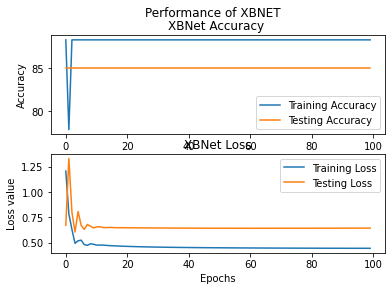

ok    61
Name: hemoglobin_hgb_human, dtype: int64

In [91]:
# HDL
m_hgb = xbnet_model(df_trainu,y_hemoglobin_hgb_human,2,0.01)
# Cholesterol hdl
hemoglobin_hgb_human = predict(m_hgb,X_testu.to_numpy())
test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
test['hemoglobin_hgb_human'].value_counts()

#### Submission

In [92]:
#maindir = "/Users/Abimbola/Documents/MSc Computer Science/Semester 2/Computer science project/Blood-Spectorscopy/Data" # Directory with your files
maindir = "/content"
ss =  maindir+"/Updated_Sample_Submission.csv"
ss = pd.read_csv(ss)
ss.head()

ss = ss.drop(['Unnamed: 0'], axis= 1)

In [93]:
def transform_c_hdl(row):
    return pd.Series([str(row["donation_id"]) + "_hdl_cholesterol_human", row['hdl_cholesterol_human']])

In [94]:
sample_c_hdl = pd.DataFrame(columns = ss.columns)

In [95]:
from tqdm.notebook import tqdm

tqdm.pandas()
sample_c_hdl[['Donation_ID', 'target']] = test.progress_apply(transform_c_hdl, axis = 1)

  0%|          | 0/61 [00:00<?, ?it/s]

In [96]:
def transform_hemo(row):
    return pd.Series([str(row["donation_id"]) + "_hemoglobin(hgb)_human", row["hemoglobin_hgb_human"]])

In [97]:
sample_hemo = pd.DataFrame(columns = ss.columns)

In [98]:
sample_hemo[['Donation_ID', 'target']] = test.progress_apply(transform_hemo, axis = 1)

  0%|          | 0/61 [00:00<?, ?it/s]

In [99]:
sample_c_hdl

,Donation_ID,target
355,ID_1961_hdl_cholesterol_human,ok
356,ID_2067_hdl_cholesterol_human,ok
357,ID_2155_hdl_cholesterol_human,ok
358,ID_2211_hdl_cholesterol_human,ok
359,ID_2327_hdl_cholesterol_human,ok
...,...,...
411,ID_6373_hdl_cholesterol_human,ok
412,ID_6381_hdl_cholesterol_human,ok
413,ID_6391_hdl_cholesterol_human,ok
414,ID_7755_hdl_cholesterol_human,ok


In [100]:
def transform_c_ldl(row):
    return pd.Series([str(row["donation_id"]) + "_cholesterol_ldl_human", row["cholesterol_ldl_human"]])

In [101]:
sample_c_ldl = pd.DataFrame(columns = ss.columns)

In [102]:
sample_c_ldl[['Donation_ID', 'target']] = test.progress_apply(transform_c_ldl, axis = 1)

  0%|          | 0/61 [00:00<?, ?it/s]

In [103]:
submission = pd.concat([sample_c_hdl, sample_hemo, sample_c_ldl]).reset_index(drop=True)

In [104]:
submission = submission.loc[:, ~submission.columns.str.contains('^Unnamed')]

In [105]:
submission.head()

,Donation_ID,target
0,ID_1961_hdl_cholesterol_human,ok
1,ID_2067_hdl_cholesterol_human,ok
2,ID_2155_hdl_cholesterol_human,ok
3,ID_2211_hdl_cholesterol_human,ok
4,ID_2327_hdl_cholesterol_human,ok


In [106]:
submission.to_csv("./submission21.csv", index=False)

#### To do
 - Bagging with random undersampling
 - Use boosting algorithms (AdaBoost etc)
 - Read up SMOTE for imbalanced classification